# Introduction
Hello! Welcome to our CIS 545 Final Project. In this notebook, we will use big data to guide you into the world of food nutriment. If you are a food enthuastist, buckle up!


**Group Member: Ruiqi Ma, Misty Sha, Wentao Xu**

In [ ]:
!pip install mxnet

In [ ]:
!pip3 install plotly==2.7.0

In [ ]:
import pandas as pd
import numpy as np
import mxnet as mx
from mxnet.gluon import nn
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot


# Preparing the dataset
For this project, we use the dataset from kaggle: Open Food Facts (https://www.kaggle.com/datasets/openfoodfacts/world-food-facts). We start from importing and analysing the given dataset.

The dataset is densed with rows and columns. We bypass the column number restriciton to have a general outline of the food fact datasets. Two major issues bring to our attention: bunches of NaN and lengthy nutriment categories.


In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d openfoodfacts/world-food-facts

world-food-facts.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  world-food-facts.zip
replace en.openfoodfacts.org.products.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
food_fact_df = pd.read_csv("en.openfoodfacts.org.products.tsv", sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
pd.set_option('display.max_columns', None)
food_fact_df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN

## Knowing the NaN values
Let's look at the NaN values in the dataset. That is a very important aspect to look at, because that directly impact the amount of valid data we can analyse from the given dataset.

As we can see from the following analysis, this dataset contains substantial amount of NaN values that we need to clean before we ca use the data.

In [ ]:
percent_nan = food_fact_df.isnull().sum().sort_values(ascending=False) / food_fact_df.shape[0] * 100
print(food_fact_df.shape[1])
print(len(percent_nan))
print(percent_nan)
print(type(percent_nan))

163
163
water-hardness_100g       100.000000
nutrition_grade_uk        100.000000
-nervonic-acid_100g       100.000000
-erucic-acid_100g         100.000000
-mead-acid_100g           100.000000
                             ...    
created_datetime            0.002809
created_t                   0.000843
creator                     0.000843
last_modified_datetime      0.000000
last_modified_t             0.000000
Length: 163, dtype: float64
<class 'pandas.core.series.Series'>


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, '% of NAN')

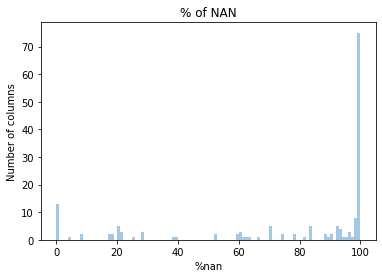

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(percent_nan, bins=100, kde=False)
plt.xlabel('%nan')
plt.ylabel('Number of columns')
plt.title('% of NAN')

Barplot of 'NaN percent per column' provides more insight on the dataframe property. Noticebly, most 'nutriment per 100g' columns show a NaN rate around 20-80%, except from essential energy atribute such as fat, carbohydrates, protein, and salt. 

Therefore, our strategy is: 
* Lifting a high threshold on NaN rate, leaving major attributes for further analysis and machine learning modeling.
* Some useful attributes(such as sugar substitute) with high NaN rate are categorized into one column for further analysis  
* Exploraty Analysis will be focus on observing relationship between nutrition ranking and available nutriment, extracting highly correlated nutriment type for featureing and modeling. 

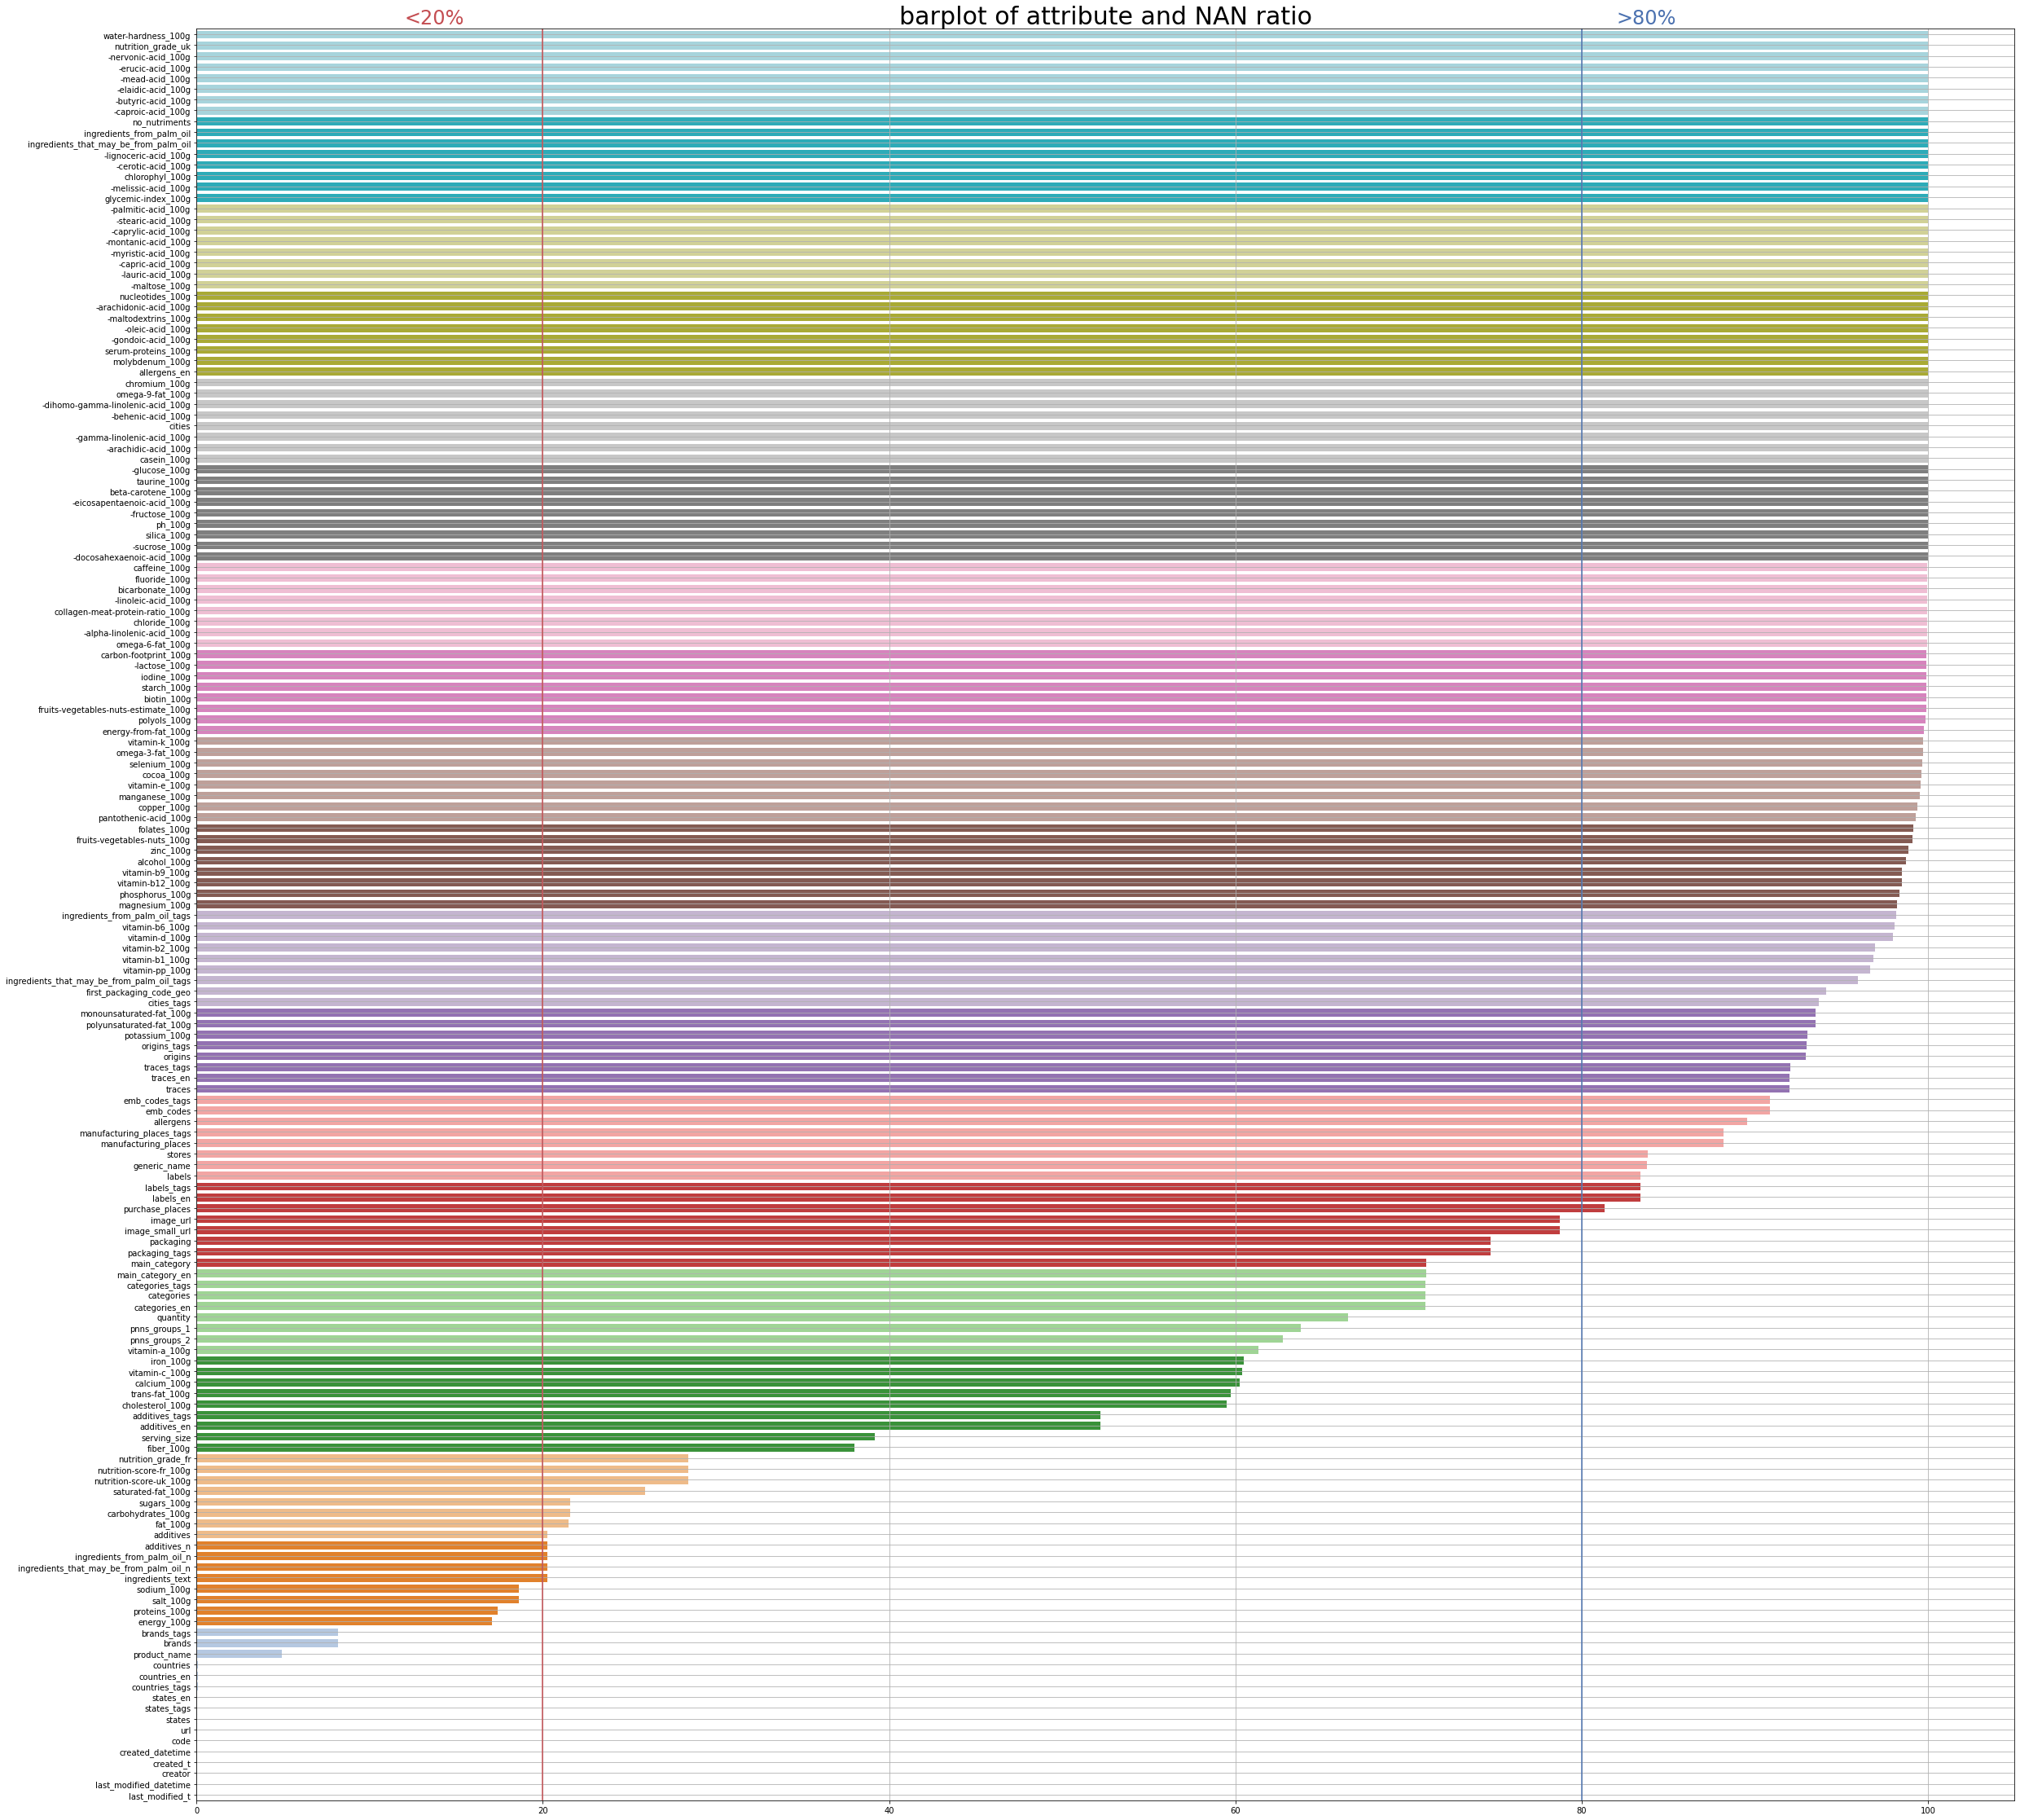

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(40, 40))
plt.title("barplot of attribute and NAN ratio", fontsize = 30)
sns.set(style = "white")
sns.set(font_scale = 2)
d = {"Attribute": list(percent_nan.to_dict().keys()), "NAN percentage": list(percent_nan.to_dict().values())}
ax = sns.barplot(y="Attribute", x="NAN percentage", palette="tab20_r", data=d, dodge=True)
# refer to the notebook https://www.kaggle.com/code/pierrekos/e-d-a-on-the-openfoodfacts-data-set
plt.axvline(x=80, color='b')
plt.text(82, -1, '>80%', color='b')
plt.axvline(x=20, color='r')
plt.text(12, -1, '<20%', color='r')
plt.grid(True)
plt.show()

## Removing unnecessary attributes
We choose 60% as NaN theshold, removing 125 indexs among 163 attributes. Most deleted attributes are different groups of acid and addictives, which are more associated with shelf life and flavors. Considering addictives could be negatively correlated with the nutrition score, we summerize addictives to number of addictives for analysis. Other summerized attributes include vitamin-b, ingredients_from palm oil, sugar_substitute, omega_fat, sugar_natural. 

Retained attributes for further analysis are 'trans-fat_100g','cholesterol_100g', 'additives_tags', 'additives_en', 'serving_size', 'fiber_100g', 'nutrition_grade_fr', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'saturated-fat_100g', 'sugars_100g', 'carbohydrates_100g', 'fat_100g', 'additives', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_text', 'sodium_100g', 'salt_100g', 'proteins_100g', 'energy_100g', 'brands_tags', 'brands', 'product_name', 'countries', 'countries_en', 'countries_tags', 'states_en', 'states_tags', 'states', 'url', 'code', 'created_datetime', 'created_t', 'creator', 'last_modified_datetime', 'last_modified_t'

In [ ]:
nan_index = percent_nan[percent_nan > 60 ].index
nan_index

Index(['water-hardness_100g', 'nutrition_grade_uk', '-nervonic-acid_100g',
       '-erucic-acid_100g', '-mead-acid_100g', '-elaidic-acid_100g',
       '-butyric-acid_100g', '-caproic-acid_100g', 'no_nutriments',
       'ingredients_from_palm_oil',
       ...
       'categories_tags', 'categories', 'categories_en', 'quantity',
       'pnns_groups_1', 'pnns_groups_2', 'vitamin-a_100g', 'iron_100g',
       'vitamin-c_100g', 'calcium_100g'],
      dtype='object', length=125)

In [ ]:
food_fact_df['vitamin-b_100g'] = food_fact_df[[col for col in food_fact_df.columns if col.startswith('vitamin-b')]].sum(axis=1)
food_fact_df['ingredients_from_palm_oil_100g'] = food_fact_df[['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']].sum(axis=1)
food_fact_df['sugar_substitute_100g'] = food_fact_df[['-maltose_100g', '-sucrose_100g']].sum(axis=1)
food_fact_df['omega-fat_100g'] = food_fact_df[[col for col in food_fact_df.columns if col.startswith('omega')]].sum(axis=1)
food_fact_df['sugar_natural_100g'] = food_fact_df[['sugars_100g', '-fructose_100g', '-glucose_100g', '-lactose_100g']].sum(axis=1) 

In [ ]:
print(len(nan_index))

125


In [ ]:
removed_index = percent_nan[percent_nan > 60].index
removed_index
print(len(removed_index))
print(len(percent_nan[percent_nan <= 100].index))

125
163


In [ ]:
cleaned_food_fact_df = food_fact_df.drop(removed_index, axis = 1)

In [ ]:
print(pd.options.display.max_seq_items)
pd.options.display.max_seq_items = None
index_retain = percent_nan[percent_nan <= 60].index
index_retain

100


Index(['trans-fat_100g', 'cholesterol_100g', 'additives_tags', 'additives_en',
       'serving_size', 'fiber_100g', 'nutrition_grade_fr',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g',
       'saturated-fat_100g', 'sugars_100g', 'carbohydrates_100g', 'fat_100g',
       'additives', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'ingredients_text',
       'sodium_100g', 'salt_100g', 'proteins_100g', 'energy_100g',
       'brands_tags', 'brands', 'product_name', 'countries', 'countries_en',
       'countries_tags', 'states_en', 'states_tags', 'states', 'url', 'code',
       'created_datetime', 'created_t', 'creator', 'last_modified_datetime',
       'last_modified_t'],
      dtype='object')

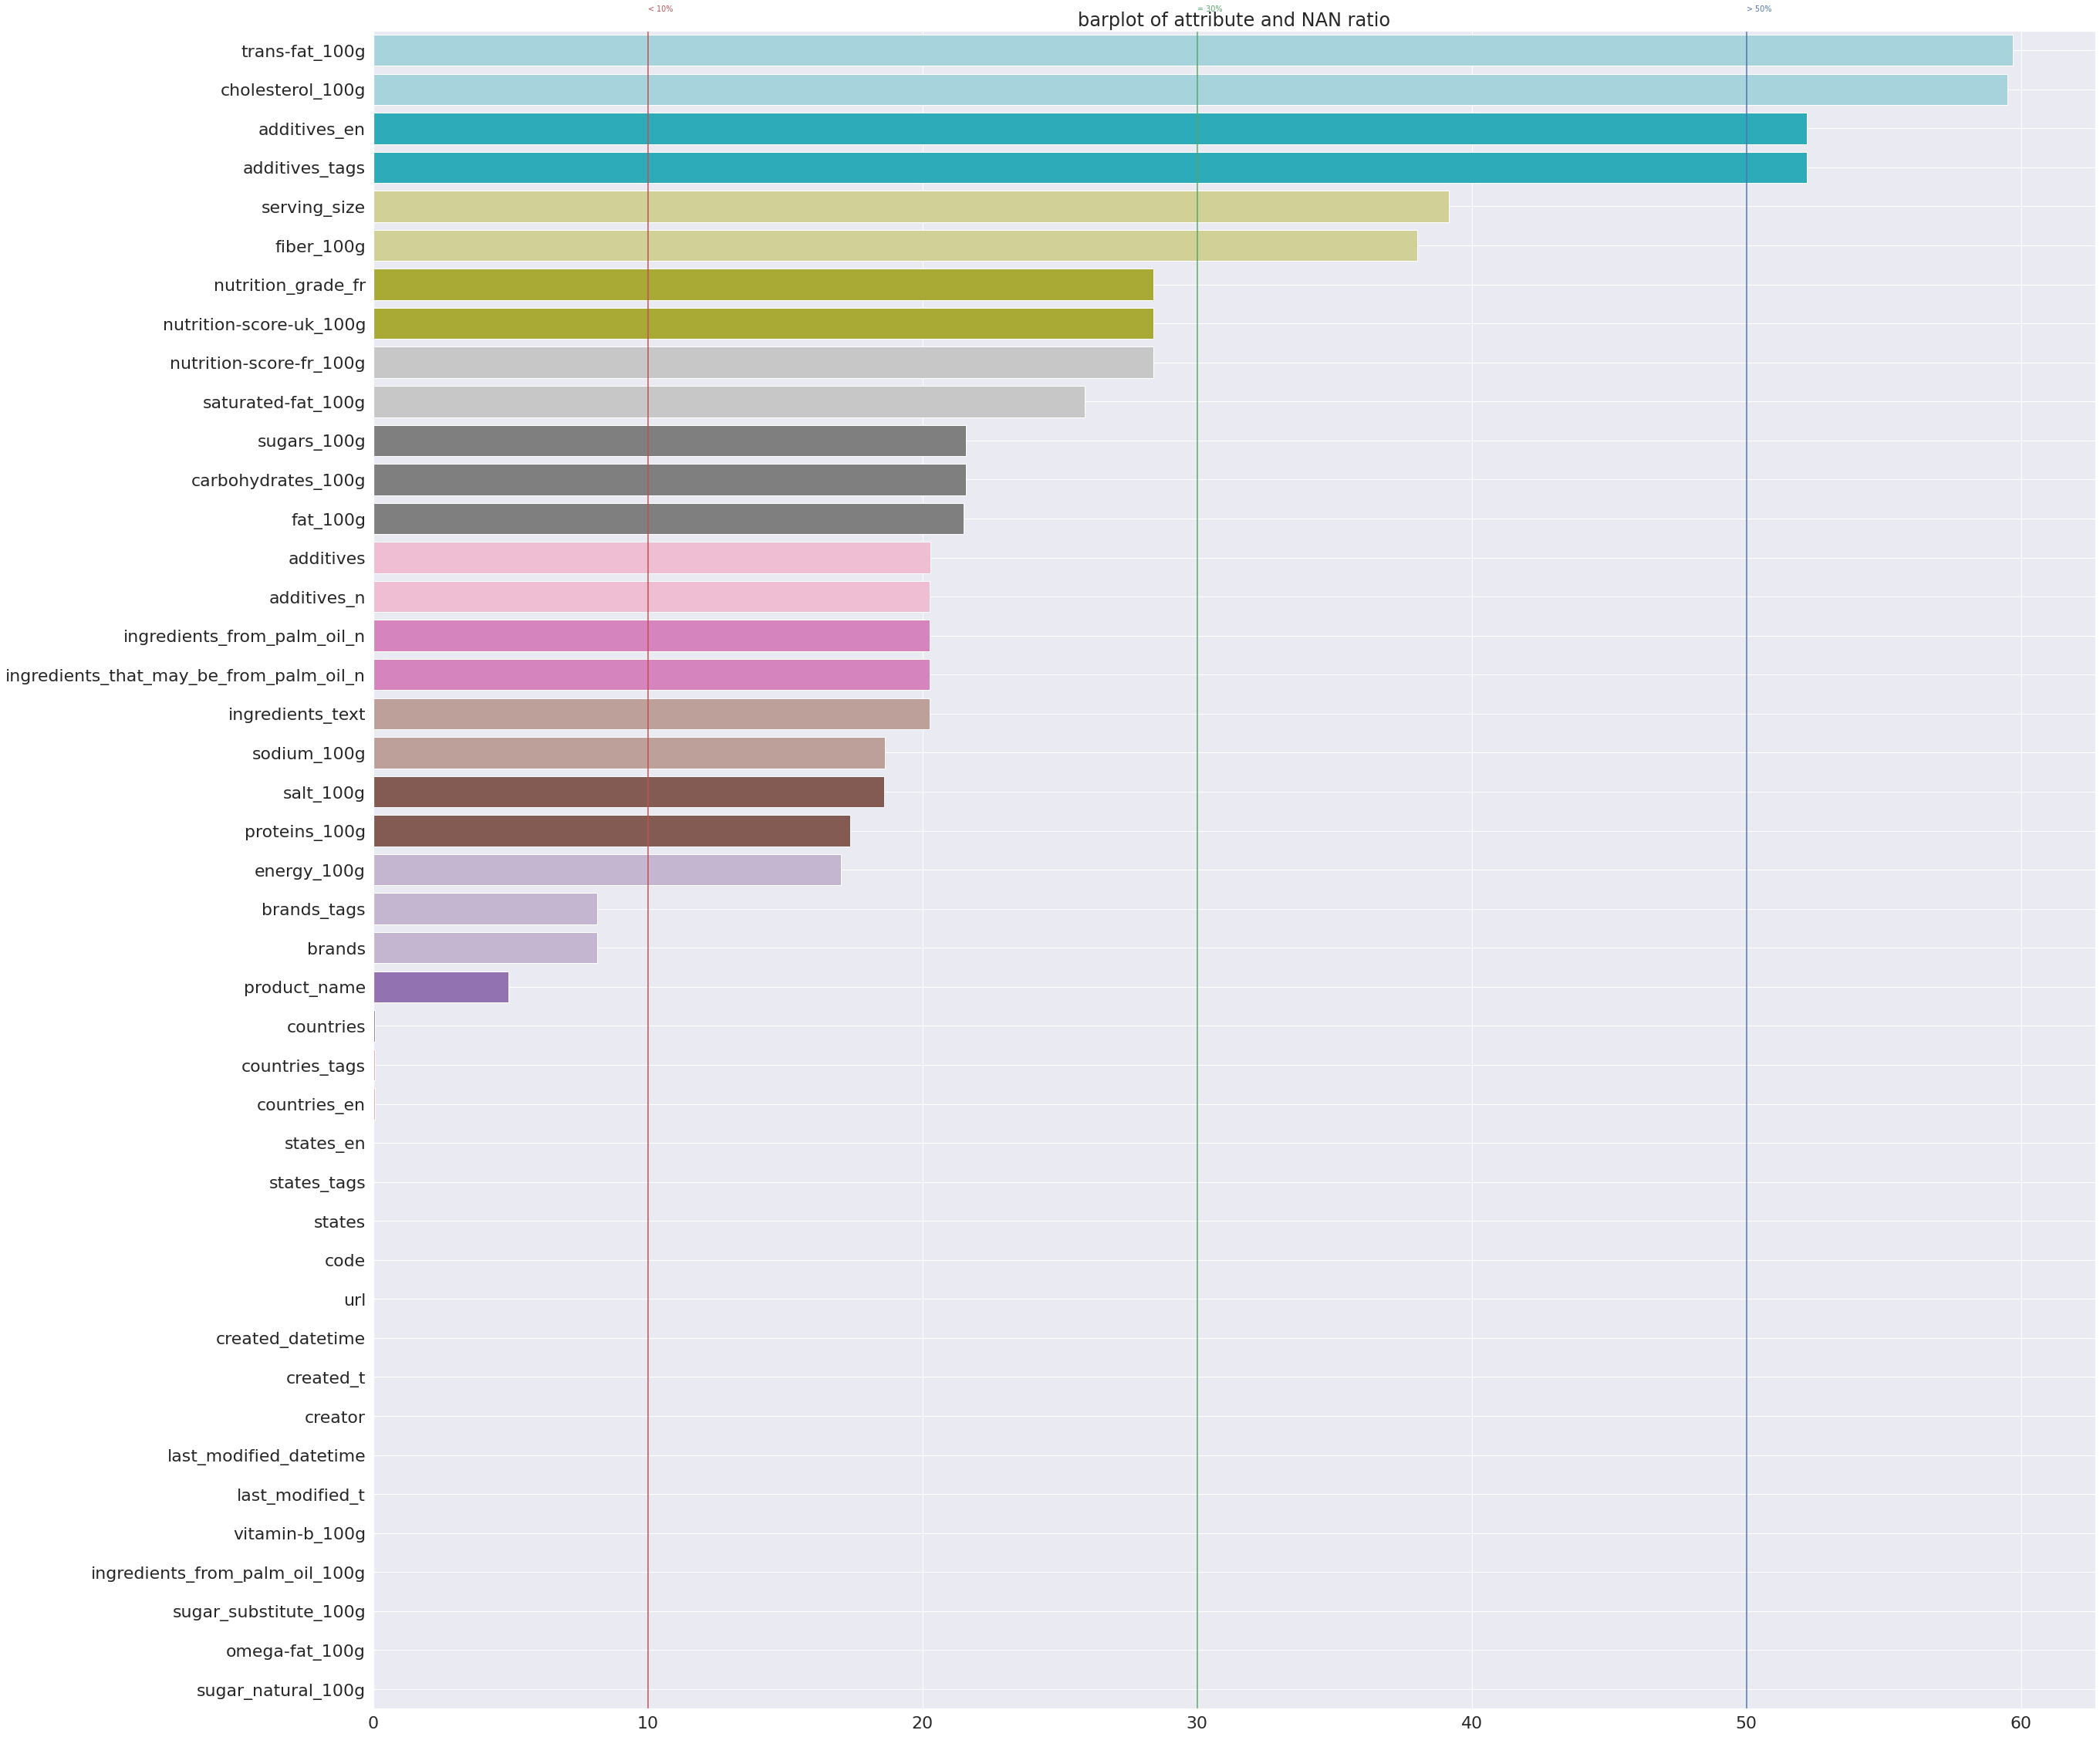

In [ ]:
pd.set_option('display.max_columns', None)
# print(cleaned_food_fact_df)
percent_nan = cleaned_food_fact_df.isnull().sum().sort_values(ascending=False) / cleaned_food_fact_df.shape[0] * 100
# print(percent_nan)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(40, 40))
plt.title("barplot of attribute and NAN ratio")
sns.set(style = "white")
sns.set(font_scale = 0.8)
d = {"Attribute": list(percent_nan.to_dict().keys()), "NAN percentage": list(percent_nan.to_dict().values())}
ax = sns.barplot(y="Attribute", x="NAN percentage", palette="tab20_r", data=d, dodge=True)
plt.axvline(x = 50, color='b')
plt.text(50, -1, '> 50%', color='b')
plt.axvline(x = 10, color='r')
plt.text(10, -1, '< 10%', color='r')
plt.axvline(x = 30, color='g')
plt.text(30, -1, '= 30%', color='g')
plt.grid(True)
plt.show()

The remaining attributes can be divided into two categories, product informaiton columns and nutriment information columns. Some of the product info columns are providing duplicate information, such as country_en, country_fr, and country_code. We will filter duplicating columns here. 

For nutriment column, we will fill all NaN into 0 for better comparison. 

In [ ]:
# clean the data again
columns_dic = {'attribute': [i for i in percent_nan.to_dict().keys()]}
print(columns_dic)

# get the ratio of nan and valid values
ratio_table = pd.DataFrame(index = ['num of NAN', 'num of valid values', 'ratio'], columns = columns_dic['attribute'])
for i in range(len(columns_dic['attribute'])):
  current_col = columns_dic['attribute'][i]
  ratio_table.loc['num of NAN', current_col] = cleaned_food_fact_df[current_col].isnull().sum()
  ratio_table.loc['num of valid values', current_col] = cleaned_food_fact_df.shape[0] - cleaned_food_fact_df[current_col].isnull().sum()
  ratio_table.loc['ratio', current_col] = ratio_table.loc['num of valid values', current_col] / cleaned_food_fact_df.shape[0] * 100.0

# show the ratio of nan and valid values
# ratio_table

pie_config = {'attrribute': columns_dic['attribute'], 'ratio': ratio_table.loc['ratio', columns_dic['attribute']], 'num of NAN': (100.0 - ratio_table.loc['ratio', columns_dic['attribute']])}
pie_config = pd.DataFrame(pie_config)
pie_config

{'attribute': ['trans-fat_100g', 'cholesterol_100g', 'additives_en', 'additives_tags', 'serving_size', 'fiber_100g', 'nutrition_grade_fr', 'nutrition-score-uk_100g', 'nutrition-score-fr_100g', 'saturated-fat_100g', 'sugars_100g', 'carbohydrates_100g', 'fat_100g', 'additives', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_text', 'sodium_100g', 'salt_100g', 'proteins_100g', 'energy_100g', 'brands_tags', 'brands', 'product_name', 'countries', 'countries_tags', 'countries_en', 'states_en', 'states_tags', 'states', 'code', 'url', 'created_datetime', 'created_t', 'creator', 'last_modified_datetime', 'last_modified_t', 'vitamin-b_100g', 'ingredients_from_palm_oil_100g', 'sugar_substitute_100g', 'omega-fat_100g', 'sugar_natural_100g']}


,attrribute,ratio,num of NAN
trans-fat_100g,trans-fat_100g,40.289922,59.710078
cholesterol_100g,cholesterol_100g,40.49412,59.50588
additives_en,additives_en,47.802273,52.197727
additives_tags,additives_tags,47.802273,52.197727
serving_size,serving_size,60.843981,39.156019
fiber_100g,fiber_100g,61.984906,38.015094
nutrition_grade_fr,nutrition_grade_fr,71.583335,28.416665
nutrition-score-uk_100g,nutrition-score-uk_100g,71.583335,28.416665
nutrition-score-fr_100g,nutrition-score-fr_100g,71.583335,28.416665
saturated-fat_100g,saturated-fat_100g,74.101964,25.898036


In [ ]:
# clean suffix and prefix
cleaned_columns = []

for attr in columns_dic['attribute']:
  if attr.endswith('_100g') and attr not in ['nutrition-score-uk_100g', 'nutrition-score-fr_100g']:
    continue
  if attr.endswith('_en'):
    continue
  if attr.endswith('_tags'):
    continue
  if attr.endswith('_fr') and attr != 'nutrition_grade_fr':
    continue
  if attr.endswith('_datetime'):
    continue
  if attr.endswith('_t'):
    continue
  cleaned_columns.append(attr)

nutrition_related_columns = []
nutrtion_filter_list = ['energy_100g', 'energy-from-fat_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'carbon-footprint_100g']
for attr in columns_dic['attribute']:
  if attr not in nutrtion_filter_list and attr.endswith('_100g'):
    nutrition_related_columns.append(attr)

pie_config = pie_config.loc[cleaned_columns,:]
pie_config = pie_config.sort_values(by='ratio', ascending=False)

                                                                      attrribute  \
serving_size                                                        serving_size   
nutrition_grade_fr                                            nutrition_grade_fr   
nutrition-score-uk_100g                                  nutrition-score-uk_100g   
nutrition-score-fr_100g                                  nutrition-score-fr_100g   
additives                                                              additives   
additives_n                                                          additives_n   
ingredients_from_palm_oil_n                          ingredients_from_palm_oil_n   
ingredients_that_may_be_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n   
ingredients_text                                                ingredients_text   
brands                                                                    brands   
product_name                                                        product_

In [ ]:
columns_to_fill = []
for s in cleaned_food_fact_df.columns:
    if s.endswith('_100g'):
      if not s.startswith('nutrition-score'):
        columns_to_fill.append(s)
    
print(columns_to_fill)

for c in [s for s in cleaned_food_fact_df.columns if s in columns_to_fill]:
    cleaned_food_fact_df[c].fillna(0, inplace=True)

['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-b_100g', 'ingredients_from_palm_oil_100g', 'sugar_substitute_100g', 'omega-fat_100g', 'sugar_natural_100g']


In [ ]:
cleaned_food_fact_df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_en,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_en,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,vitamin-b_100g,ingredients_from_palm_oil_100g,sugar_substitute_100g,omega-fat_100g,sugar_natural_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",0.0,0.00,0.00,0.0,0.000,0.00,0.00,0.0,0.00,0.00000,0.000,NaN,NaN,0.0,0.0,0.0,0.0,0.00
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0,0.0,0.0,0.0,0.0,14.29
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0,0.0,0.0,0.0,0.0,17.86
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,United States,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2540.0,57.14,5.36,0.0,0.000,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0,0.0,0.0,0.0,0.0,3.57
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,United States,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1552.0,1.43,0.00,0.0,0.000,77.14,0.00,5.7,8.57,0.00000,0.000,NaN,NaN,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356022,99567453,http://world-en.openfoodfacts.org/product/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,US,en:united-states,United States,"Organic peppermint, organic lemon grass, organ...",20 g


#EDA

Our EDA starts from nutriment analysis on single products. For visualizing purpose, we will choose 7 attributes: 'fat_100g', 'trans-fat_100g', 'saturated-fat_100g', 'sugars_100g', 'carbohydrates_100g', 'proteins_100g', 'salt_100g' to draw the radar chart for each products. These are common contributing factors as people compares the products. 

In [ ]:
cleaned_food_fact_df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_en,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_en,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,vitamin-b_100g,ingredients_from_palm_oil_100g,sugar_substitute_100g,omega-fat_100g,sugar_natural_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",0.0,0.00,0.00,0.0,0.000,0.00,0.00,0.0,0.00,0.00000,0.000,NaN,NaN,0.0,0.0,0.0,0.0,0.00
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0,0.0,0.0,0.0,0.0,14.29
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0,0.0,0.0,0.0,0.0,17.86
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,United States,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2540.0,57.14,5.36,0.0,0.000,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0,0.0,0.0,0.0,0.0,3.57
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,United States,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1552.0,1.43,0.00,0.0,0.000,77.14,0.00,5.7,8.57,0.00000,0.000,NaN,NaN,0.0,0.0,0.0,0.0,0.00


In [ ]:
nutriment_columns = ['fat_100g', 'trans-fat_100g', 'saturated-fat_100g', 'sugars_100g', 'carbohydrates_100g',
                 'proteins_100g', 'salt_100g']

In [ ]:
cleaned_food_fact_df[nutriment_columns]

,fat_100g,trans-fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,proteins_100g,salt_100g
0,0.00,0.0,0.00,0.00,0.00,0.00,0.00000
1,28.57,0.0,28.57,14.29,64.29,3.57,0.00000
2,17.86,0.0,0.00,17.86,60.71,17.86,0.63500
3,57.14,0.0,5.36,3.57,17.86,17.86,1.22428
4,1.43,0.0,0.00,0.00,77.14,8.57,0.00000
...,...,...,...,...,...,...,...
356022,0.00,0.0,0.00,0.00,0.00,0.00,0.00000
356023,0.00,0.0,0.00,0.00,0.00,0.00,0.00000
356024,0.00,0.0,0.00,0.00,0.00,0.00,0.00000
356025,0.00,0.0,0.00,0.00,0.00,0.00,0.00000


##Sugar
Sugars are a type of simple carbohydrate that occur naturally in some foods and drinks. They are also an additive in certain foods and drinks. Consuming too much sugar can lead to health problems, such as increasing the risk of weight gain, diabetes, tooth cavities, and more. Many healthful food products, such as dairy products, vegetables, and fruit, naturally contain sugars. It is important for people to include these foods in their diet, as they come with a range of other nutrients that provide valuable health benefits.

However, manufacturers tend to add sugar to foods such as cereals and cake and some drinks. It is these added sugars, or free sugars, that cause health problems. Unlike foods and drinks that naturally contain sugar, those with added sugar provide no nutritional value. They are also a poor energy source, as the body digests added sugar very quickly. Consuming too much may cause health problems over time.

Except from sugars attribution to teeth health and heart diseas, two major effect of added sugar are weight gain and diabetes, making sugar first enemy of people with fitness need and susceptible to diabetes. In this part, we will specifically look at the nutrition distribution among the radar chart of high sugar food and the interconnectedness. 

In [ ]:
sugar_chart = cleaned_food_fact_df.sort_values(by = ['sugars_100g'], ascending=False).loc[(cleaned_food_fact_df[nutriment_columns] != 0).all(axis=1), :]
mean_values = list(sugar_chart[nutriment_columns].mean().values)

In [ ]:
mean_values

[17.790217096336512,
 2.56772900045229,
 6.933003165988237,
 19.29424966078691,
 38.93067164179109,
 6.814069199457258,
 1.662057442786073]

Reference: https://www.kaggle.com/code/fabiendaniel/food-feed-facts

In [ ]:
import math
from math import pi
def spider(values, cat, ax):
    N = len(cat)
    x_as = [n / float(N) * 2 * pi for n in range(N)]
    # for circularity
    values += values[:1]
    x_as += x_as[:1]
    # Set color of axes
    plt.rc('axes', linewidth=0.5, edgecolor="#888888")
    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Set position of y-labels
    ax.set_rlabel_position(0)
    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    # Set ticks values and labels    
    ax.set_xticks(x_as[:-1])
    ax.set_xticklabels([])
    ax.set_yticks([0.1, 0.5, 1, 2, 10])
    ax.set_yticklabels(["0.1", "0.5", "1", "2", "10"])
    # Plot data
    ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)
        # Fill area
    ax.fill(x_as, values, 'b', alpha=0.3)
    # Set axes limits
    ax.set_ylim(0, 3)
    # Draw ytick labels to make sure they fit properly
    for i in range(N):
        angle_rad = i / float(N) * 2 * pi
        if angle_rad == 0:
            ha, distance_ax = "center", 3
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 3
        elif angle_rad == pi:
            ha, distance_ax = "center", 3
        else:
            ha, distance_ax = "right", 3

        ax.text(angle_rad, 0.2+distance_ax, cat[i], size=10,
                horizontalalignment=ha, verticalalignment="center")


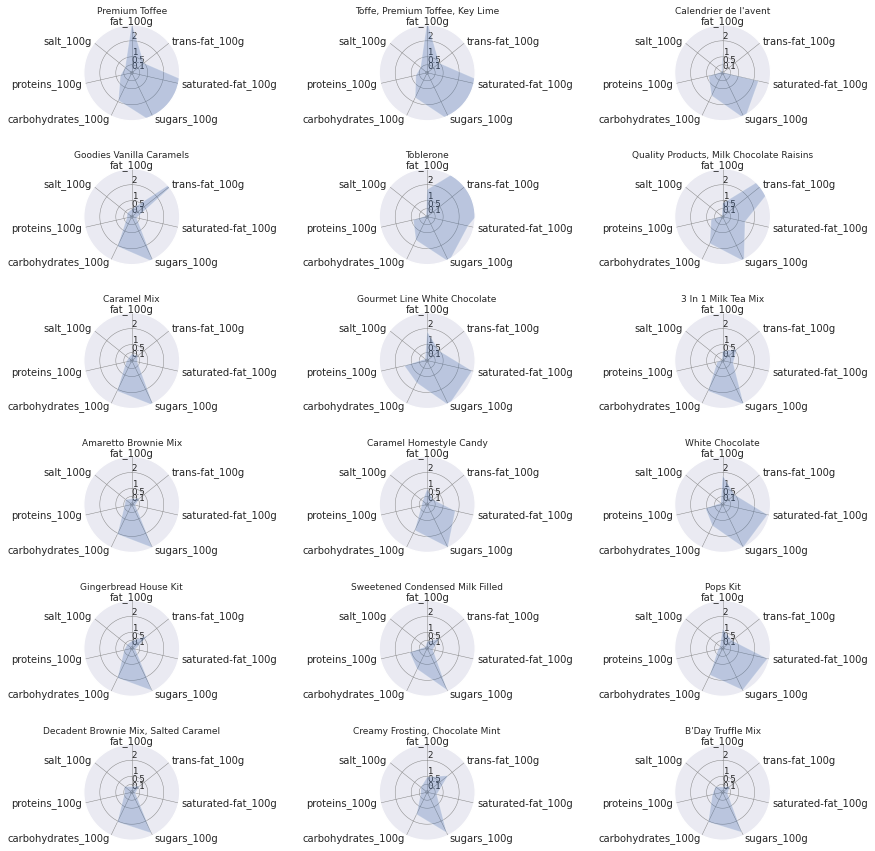

In [ ]:
fig, axes = plt.subplots(nrows = 6, ncols=3, subplot_kw=dict(projection='polar'), figsize=(15,15))
axes = np.array(axes)

list_nutriments = [s.strip('_100g') for s in nutriment_columns]

ind = 0
for ax in axes.reshape(-1):
    ind += 1
    ind2 = 4*ind
    absolute_values = list(sugar_chart.iloc[ind2][nutriment_columns].T.values)
    values  = [ val/mean_values[i] for i, val in enumerate(absolute_values)]
    spider(values, nutriment_columns, ax)
    ax.set_title(sugar_chart.iloc[ind2]['product_name'], fontsize = 9)
    
fig.subplots_adjust(hspace=0.5)
plt.show()

## Sugar Summary
As the radar chart shows, sugar amount is related to carbohydrates and fat, either saturated fat or trans-fat. Together, they provide great contribution to total energy intake. Considering the product type, most sugar intake are supplied by (Solid Fats and Added Sugars) SoFAS beverages and sweets and desserts. 

##Fat
Fats are made up of three molecules joined together. This three-molecule structure is called a “triglyceride”. People can get most fat made by their bodies, but can only get some other fats from food. These fats are called “essential” fats because it is essential that we get them from food. Essential fats include Omega-3 fats (found in foods such as fish and flax seed) and Omega-6 fats (found in foods such as nuts, seeds, and corn oil).

Overall, there are three main types of fats from food: unsaturated fats from plant food, saturated fats from animal foods, and trans fats from commercially processed foods.

Fats give our bodies energy, protect our organs, support cell growth, keep cholesterol and blood pressure under control, and help us to absorb vital nutrients. Therefore, if some people are too focused on not consuming fats, they deprive their bodies of one of the most important nutriments. However, too much concumption of fats leads to increase in total cholesterol and blood pressure, as well as overweight. Therefore, finding the right level of fats from food is very important.

Similarly, we order the food by fat in a decending order, and observe the other key nutriment content using radar charts.

In [ ]:
fat_chart = cleaned_food_fact_df.sort_values(by = ['fat_100g'], ascending=False).loc[(cleaned_food_fact_df[nutriment_columns] != 0).all(axis=1), :]
mean_values = list(fat_chart[nutriment_columns].mean().values)

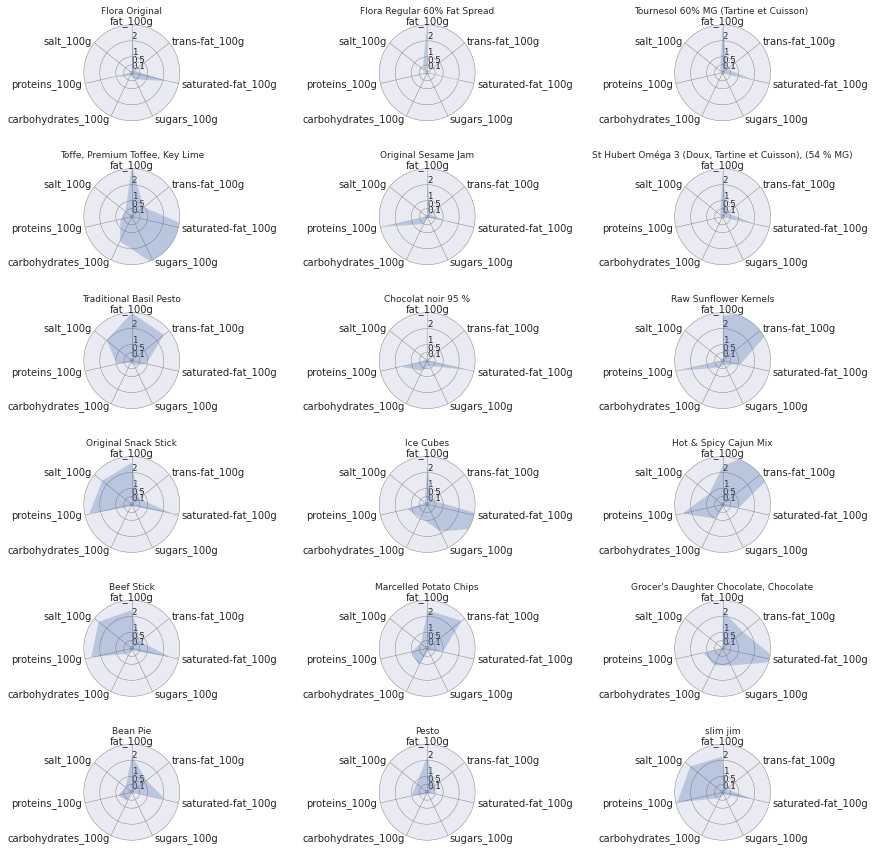

In [ ]:
fig, axes = plt.subplots(nrows = 6, ncols=3, subplot_kw=dict(projection='polar'), figsize=(15,15))
axes = np.array(axes)

list_nutriments = [s.strip('_100g') for s in nutriment_columns]

ind = 0
for ax in axes.reshape(-1):
    ind += 1
    ind2 = 4*ind
    absolute_values = list(fat_chart.iloc[ind2][nutriment_columns].T.values)
    values  = [ val/mean_values[i] for i, val in enumerate(absolute_values)]
    spider(values, nutriment_columns, ax)
    ax.set_title(fat_chart.iloc[ind2]['product_name'], fontsize = 9)
    
fig.subplots_adjust(hspace=0.5)
plt.show()

## Fat Summary

Although there are many types of fat, fat source for high-fat products are trans-fat and saturated fat, both of which fall in unhealthy fat for body health. Others that are positively related to fat content are salt and protein. It is estimated that body need about 500 mg of sodium daily functions and 1 serving size of these food are already providing more salt than we need. Too much sodium in the diet can lead to high blood pressure, heart disease, and stroke. It can also cause calcium losses, some of which may be pulled from bone.

##Salt
Salt, sodium chloride, is about 40% sodium and 60% chloride. It flavors food and is also a food preservative, as bacteria can’t thrive in the presence of a high amount of salt. Salt is naturally present at low levels in all foods but most of our salt intake is hidden in processed food and convenience foods, and the rest comes from salt added during cooking and any salt added at the table.

Our body requires a small amount of sodium to conduct nerve impulses, contract and relax muscles, and maintain the proper balance of water and minerals. People need about 500 mg of sodium daily for these vital functions, but too much sodium in the diet can lead to high blood pressure, heart disease, and stroke. It can also cause calcium losses by pulling some calcium from bone. 

Similarly, we order the food by salt in a decending order, and observe the other key nutriment content using radar charts.

In [ ]:
salt_chart = cleaned_food_fact_df.sort_values(by = ['salt_100g'], ascending=False).loc[(cleaned_food_fact_df[nutriment_columns] != 0).all(axis=1), :]
mean_values = list(salt_chart[nutriment_columns].mean().values)

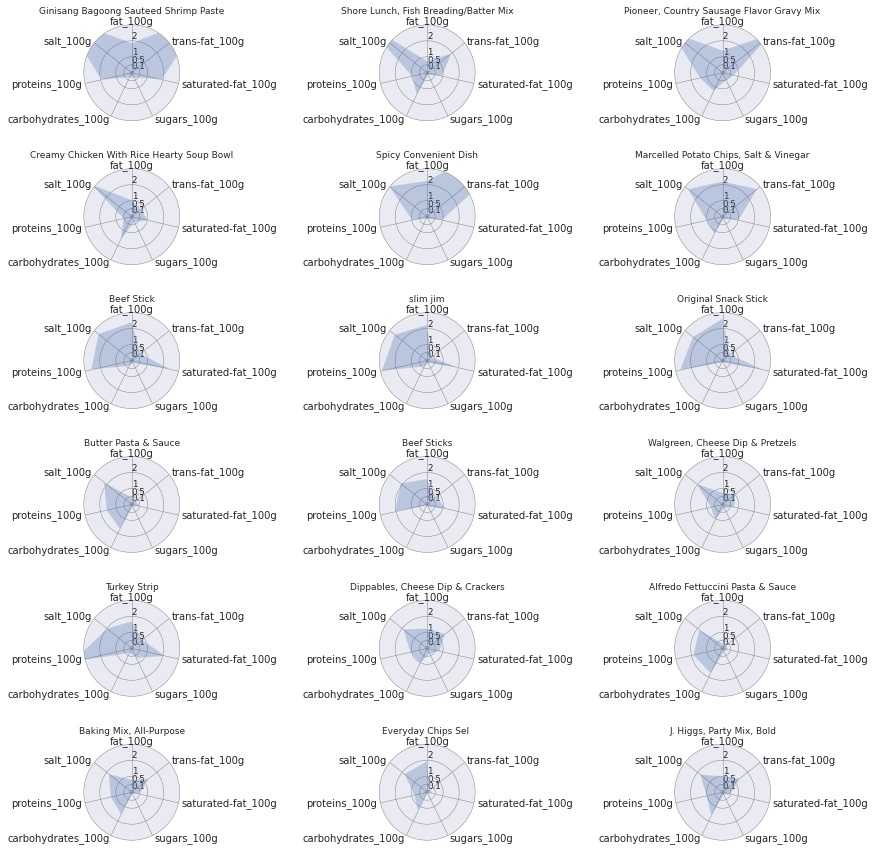

In [ ]:
fig, axes = plt.subplots(nrows = 6, ncols=3, subplot_kw=dict(projection='polar'), figsize=(15,15))
axes = np.array(axes)

list_nutriments = [s.strip('_100g') for s in nutriment_columns]

ind = 0
for ax in axes.reshape(-1):
    ind += 1
    ind2 = 4*ind
    absolute_values = list(salt_chart.iloc[ind2][nutriment_columns].T.values)
    values  = [ val/mean_values[i] for i, val in enumerate(absolute_values)]
    spider(values, nutriment_columns, ax)
    ax.set_title(salt_chart.iloc[ind2]['product_name'], fontsize = 9)
    
fig.subplots_adjust(hspace=0.5)
plt.show()

## Salt Summary

From the radar chart, we can see that salt is positively related to fat and proteins, so picking the food options that provide the most appropriate amount of these nutriments are important. While fat and proteins are very helpful to people's health, people should not overconsume salt, as having more than the daliy 500mg salt needed for our bodies introduces potential dieases.

## Protein, Carbohydrates and Fat
From earlier explanation, people are likely to jump into conclusions that fat and carbohydrates are nothing but bad inflencer for body health and are willing to restrict the intake with great effort. But macronutrients are important for general health  as well as athletic performance. Although protein, tends to get all of the glory when we think of physical activity, both carbohydrates and fats are also important. They both provide energy along with a host of other functions. 
During short, heavy exercise carbohydrates may be the only energy source for the working muscle and may be derived exclusively from the glycogen stores within the muscle fibers themselves. Carbohydrates also help us recover from physical activity, and prevent and reduce the breakdown of proteins in the body. 

Fats are also sometimes seen as negative, but it also serves numerous functions in the body including protecting our organs, helping absorb and manufacture some important nutrients, manufacturing some hormones, and also providing a source of energy. Although carbohydrates are predominate during physical activity, we still use some fat as fuel. During lower intensity physical activities and physical activities performed for a long duration, fuel from fats can be the predominate energy source. 

In this section, we will look at food with carbohydrates and proteins but restricted amount of fat using radar chart. These foods are likely to be good candidates for people at exercise. 

In [ ]:
# food to avoid if you are into fitness
from numpy.ma.core import floor_divide
fitness_chart = cleaned_food_fact_df
fitness_chart['carbonhydtates_over_fat_100g'] = fitness_chart['carbohydrates_100g']*fitness_chart['proteins_100g']/fitness_chart['fat_100g']
fitness_chart = fitness_chart.sort_values(by = ['carbonhydtates_over_fat_100g']).loc[(fitness_chart[nutriment_columns] != 0).all(axis=1), :]
mean_values = list(fitness_chart[nutriment_columns].mean().values)

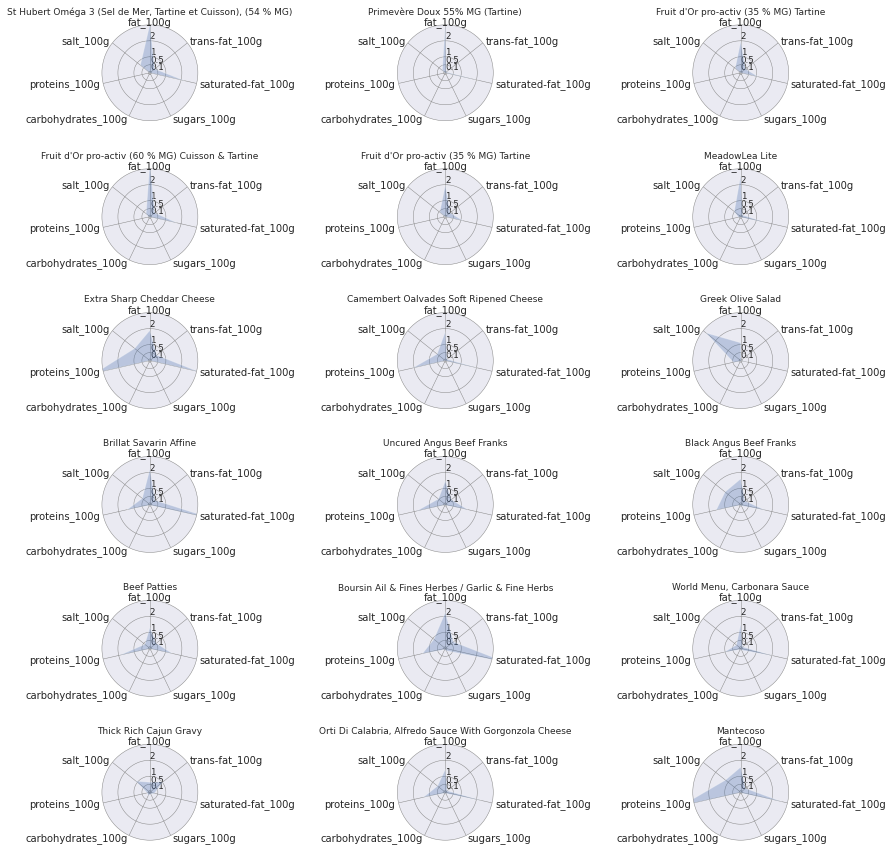

In [ ]:
fig, axes = plt.subplots(nrows = 6, ncols=3, subplot_kw=dict(projection='polar'), figsize=(15,15))
axes = np.array(axes)

list_nutriments = [s.strip('_100g') for s in nutriment_columns]

ind = 0
for ax in axes.reshape(-1):
    ind += 1
    ind2 = 4*ind
    absolute_values = list(fitness_chart.iloc[ind2][nutriment_columns].T.values)
    values  = [ val/mean_values[i] for i, val in enumerate(absolute_values)]
    spider(values, nutriment_columns, ax)
    ax.set_title(fitness_chart.iloc[ind2]['product_name'], fontsize = 9)
    
fig.subplots_adjust(hspace=0.5)
plt.show()

## Food recommendation for diabetes patients
Food selection is more complicated and limited due to insulin deprivation. Common suggestions are products with low GI, a measure of how quickly a food can make blood sugar (glucose) rise, but it's a complicated algorithm to follow and doesn't consider other attributes such as fat and salt which also provide a lot of burden to human body. 

For diabetes patients, Foods and drinks to limit include

* fried foods and other foods high in saturated fat and trans fat
* foods high in salt, also called sodium
* sweets, such as baked goods, candy, and ice cream
* beverages with added sugars, such as juice, regular soda, and regular sports or energy drinks

In [ ]:
#food to avoid if you have diabetes
from numpy.ma.core import floor_divide
dibetes_chart = cleaned_food_fact_df
dibetes_chart['carbonhydtates_multiply_sugar_100g'] = dibetes_chart['fat_100g']*dibetes_chart['sugars_100g']*dibetes_chart['salt_100g']
dibetes_chart = dibetes_chart.sort_values(by = ['carbonhydtates_multiply_sugar_100g'], ascending=False).loc[(dibetes_chart[nutriment_columns] != 0).all(axis=1), :]
mean_values = list(dibetes_chart[nutriment_columns].mean().values)

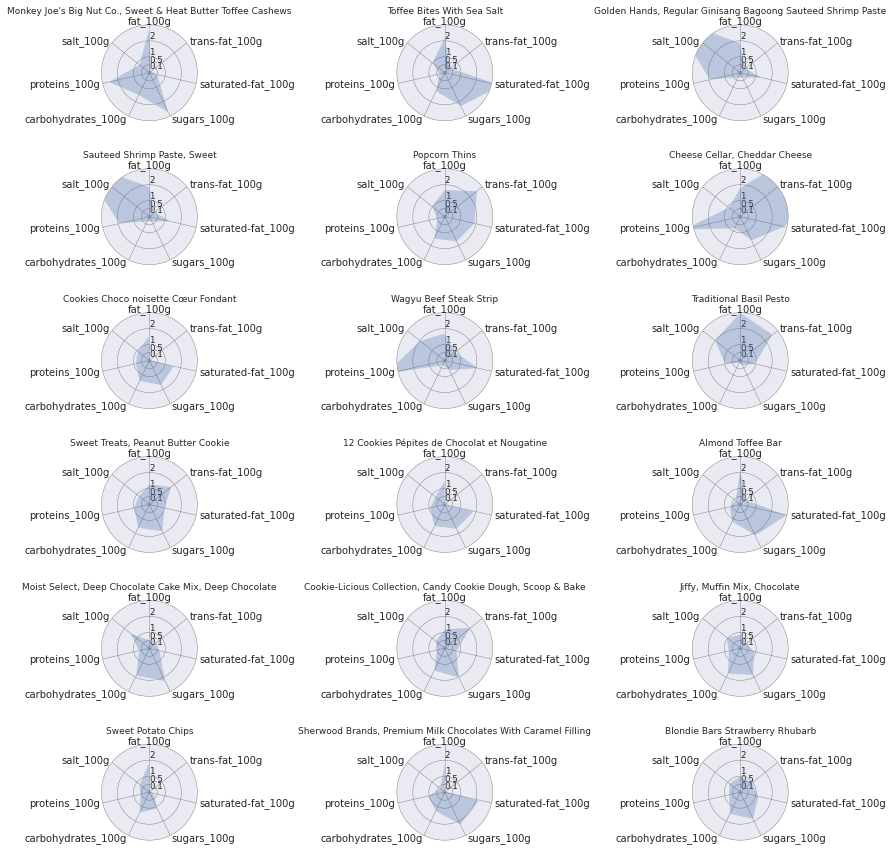

In [ ]:
fig, axes = plt.subplots(nrows = 6, ncols=3, subplot_kw=dict(projection='polar'), figsize=(15,15))
axes = np.array(axes)

list_nutriments = [s.strip('_100g') for s in nutriment_columns]

ind = 0
for ax in axes.reshape(-1):
    ind += 1
    ind2 = 4*ind
    absolute_values = list(dibetes_chart.iloc[ind2][nutriment_columns].T.values)
    values  = [ val/mean_values[i] for i, val in enumerate(absolute_values)]
    spider(values, nutriment_columns, ax)
    ax.set_title(dibetes_chart.iloc[ind2]['product_name'], fontsize = 9)
    
fig.subplots_adjust(hspace=0.5)
plt.show()

In [80]:
cleaned_food_fact_df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_en,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_en,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,vitamin-b_100g,ingredients_from_palm_oil_100g,sugar_substitute_100g,omega-fat_100g,sugar_natural_100g,carbonhydtates_over_fat_100g,carbonhydtates_multiply_sugar_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",0.0,0.00,0.00,0.0,0.000,0.00,0.00,0.0,0.00,0.00000,0.000,NaN,NaN,0.0,0.0,0.0,0.0,0.00,NaN,0.000000
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0,0.0,0.0,0.0,0.0,14.29,8.033437,0.000000
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0,0.0,0.0,0.0,0.0,17.86,60.710000,202.552046
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,United States,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2540.0,57.14,5.36,0.0,0.000,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0,0.0,0.0,0.0,0.0,3.57,5.582422,249.740632
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,United States,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1552.0,1.43,0.00,0.0,0.000,77.14,0.00,5.7,8.57,0.00000,0.000,NaN,NaN,0.0,0.0,0.0,0.0,0.00,462.300559,0.000000


45
The following are the outliers in the boxplot:[]
The following are the outliers in the boxplot:[]
The following are the outliers in the boxplot:[345696 345697 346248 346250 346298 346299 346300 346399 346407 346460
 346489 347665 347666 347667 347955 347956 348037 348629 349276 349277
 349282 351088 351304 352046 352053 352161 352265 352335 352403 353609
 353614 353631 353675 353917 353928 353941 353964 353966 353978 353979
 354009 354014 354022 354023 354039 354041 354042 354049 354057 354064
 354073 354075 354077 354079 354085 354089 354095 354097 354241 354303
 354472 354526 354528 354583 354719 354732 354749 354752 354832 354975
 355040 355187 355213 355221 355304 355459 355486 355503 355536 355539
 355706]
The following are the outliers in the boxplot:[276302 276308 276310 ... 355860 355884 355899]
The following are the outliers in the boxplot:[]
The following are the outliers in the boxplot:[]
The following are the outliers in the boxplot:[]
The following are the outliers in t

No handles with labels found to put in legend.


The following are the outliers in the boxplot:[345523 345555 345566 345668 345752 346139 346141 346142 346143 346144
 346145 346146 346147 346148 346195 346269 346270 346275 346331 346338
 346339 346355 346368 346509 346661 346662 346763 346793 346820 346927
 346928 346930 346938 347157 347494 347501 347854 348430 348528 348776
 348785 349103 349159 349281 349460 349536 349540 349737 349738 349859
 349864 350015 350506 350910 351116 351518 351564 351663 352116 352314
 352458 352699 352723 352726 352729 352730 352731 352733 352734 352736
 352737 352738 352739 352740 352741 352752 352787 353142 353143 353221
 353222 353236 353237 353245 353316 353456 353465 354132 354142 354143
 354159 354162 354180 354182 354355 354408 354410 354428 354954 354963
 355403 355493 355494 355495 355514 355515 355692 355693 355694 355695
 355758 355761 355968]
The following are the outliers in the boxplot:[195663 195673 195745 195788 195923 195989]
The following are the outliers in the boxplot:[10817 13539 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning:

Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.



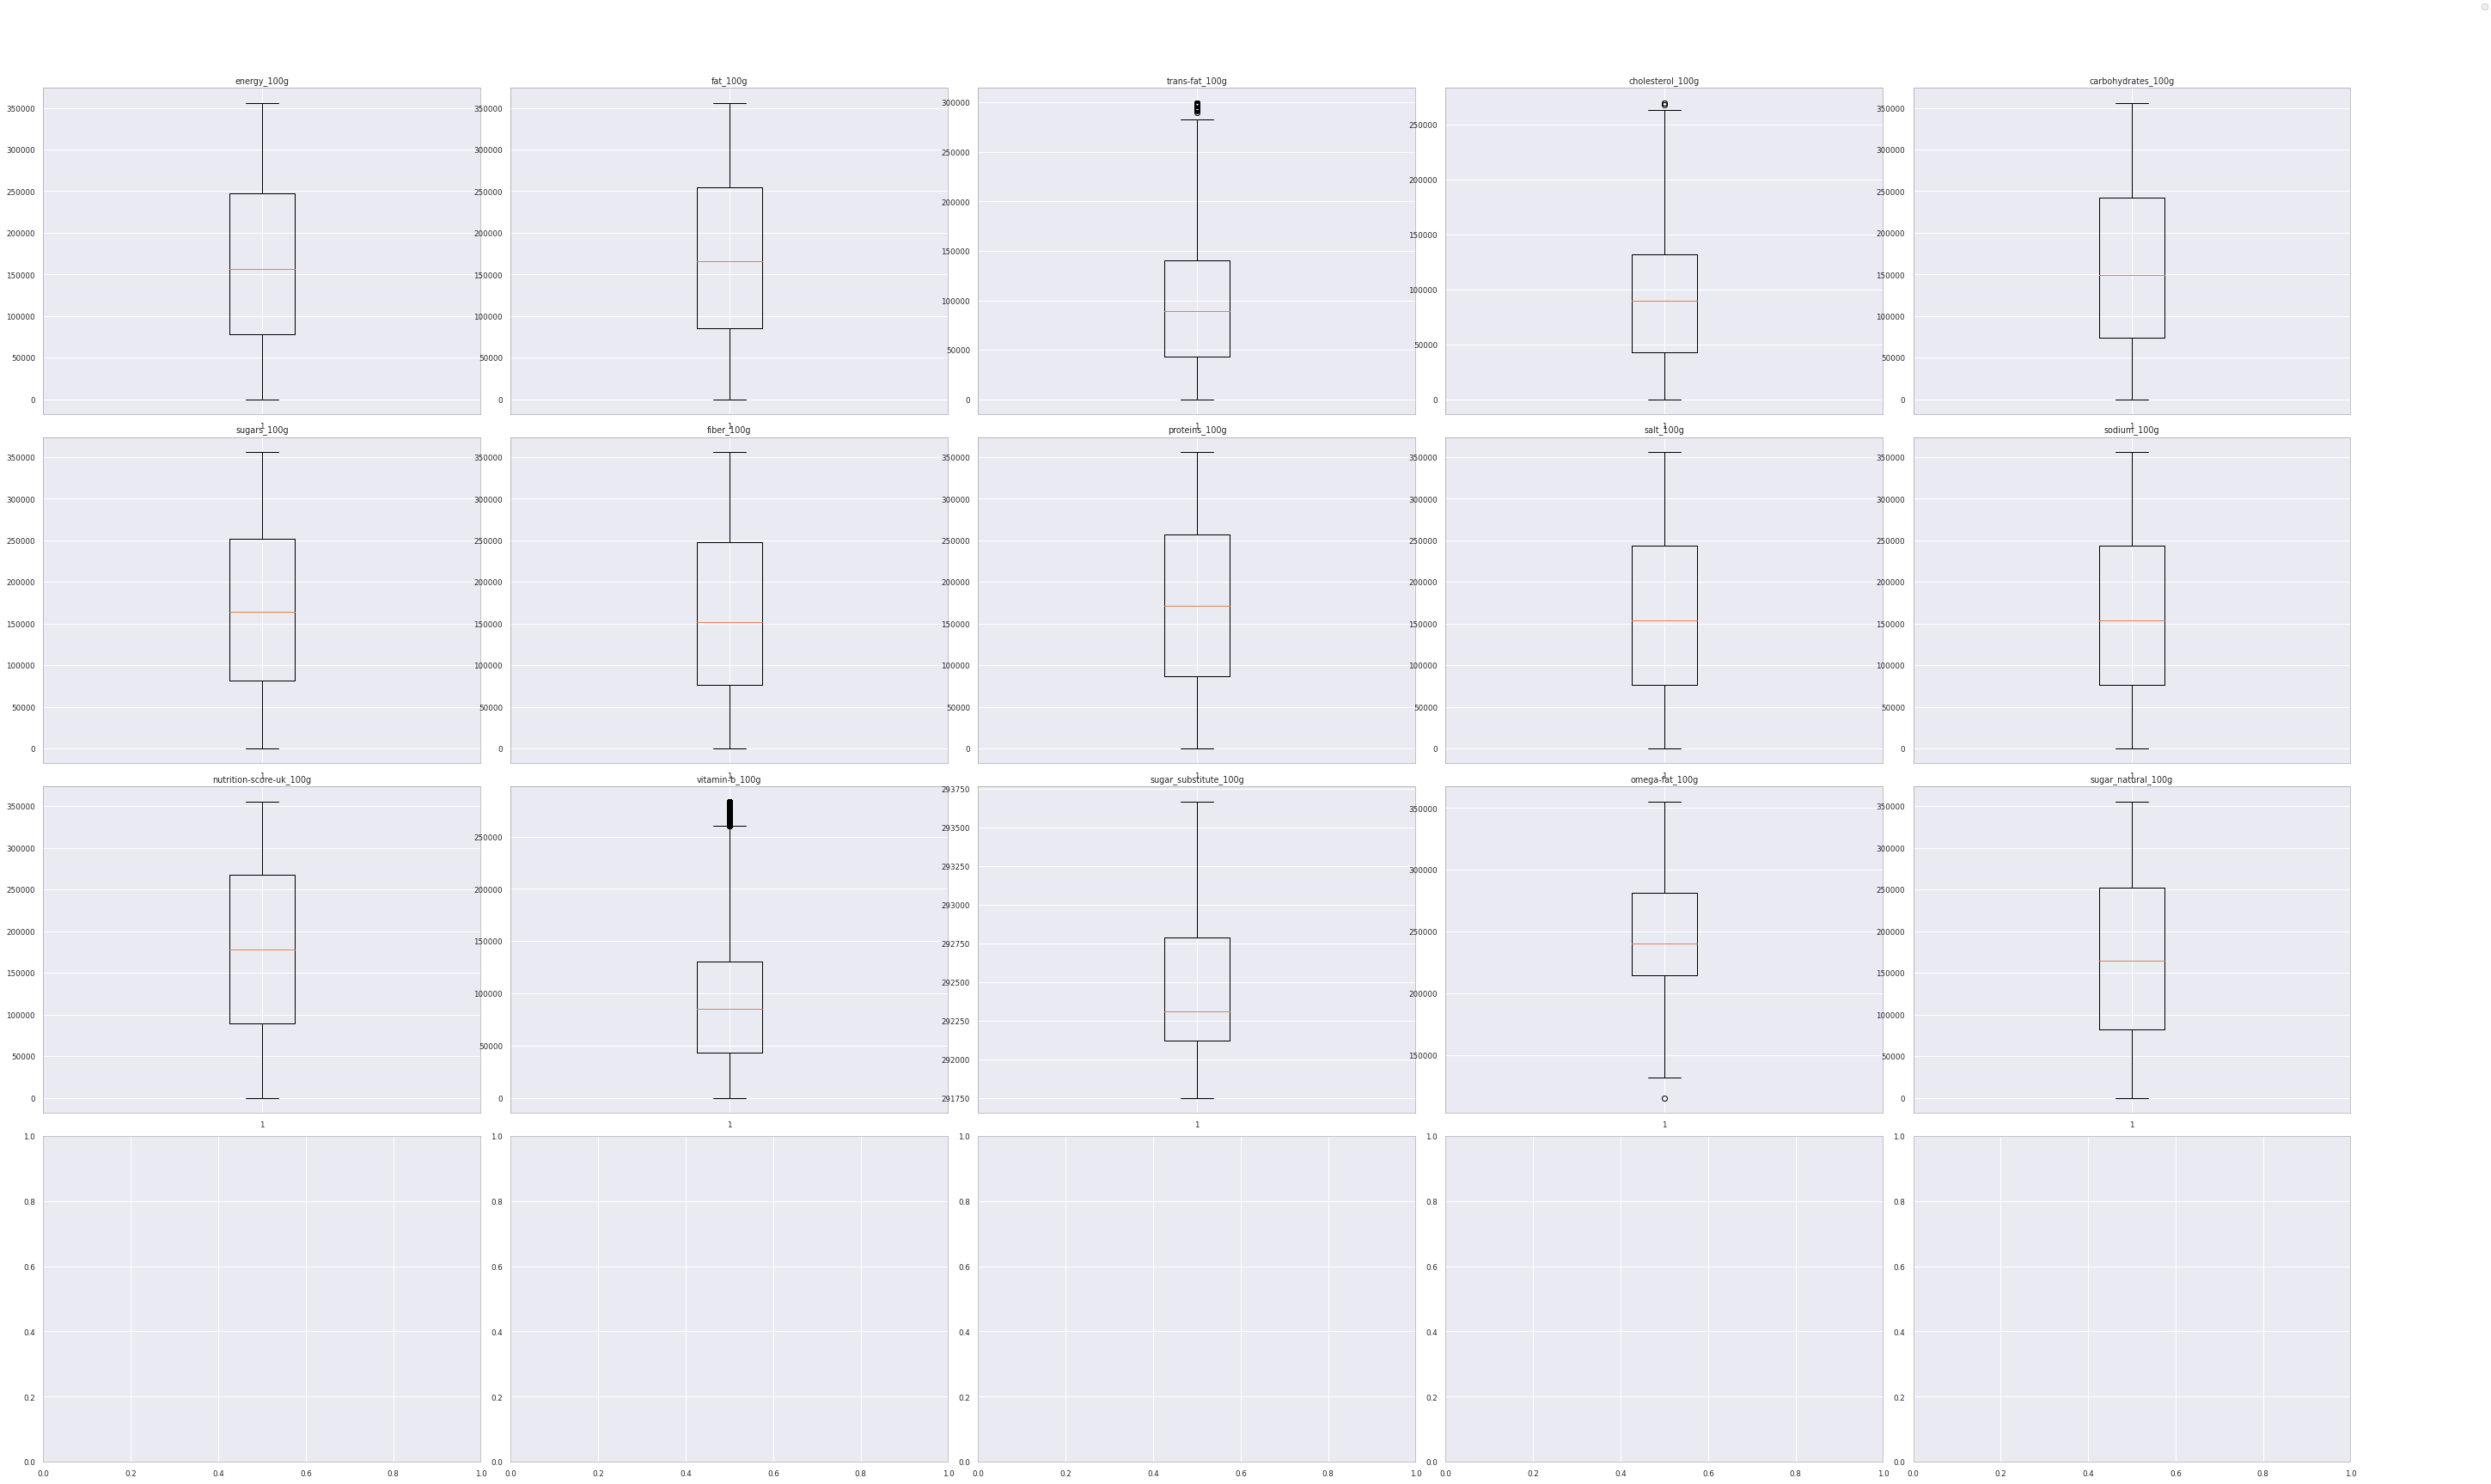

In [83]:
quantite = ['nutrition-score-uk_100g', 'monounsaturated-fat_100g','polyunsaturated-fat_100g', 
            'potassium_100g', 'vitamin-a_100g', 'iron_100g','vitamin-c_100g', 'calcium_100g', 'trans-fat_100g', 'cholesterol_100g', 'fiber_100g',
            'carbohydrates_100g', 'fat_100g', 'omega-fat_100g', 'sugar_natural_100g', 'sugars_100g', 'sugar_substitute_100g','sodium_100g', 'salt_100g', 
            'proteins_100g', 'energy_100g','ingredientsfrom_palm_oil_100g', 'vitamin-b_100g']
med_list = []
std_list = []

row = 0
column = 0
length = 8

print(cleaned_food_fact_df.shape[1])
quantite_filtered = [s for s in cleaned_food_fact_df.columns if s in quantite]
# multiplie plots in one graph
f, ax = plt.subplots(len(quantite_filtered) // 5 + 1, 5, figsize = (length * 5, length * (len(quantite_filtered) // 5)))
# some configuration
f.subplots_adjust(left=0, right=0.9, top=0.95, bottom=0, wspace=0.9, hspace=0.9)
f.tight_layout(rect=(0, 0, 0.95, 0.95), h_pad=0.5, w_pad=0.5)

for col in quantite_filtered:
  arr = cleaned_food_fact_df[col].to_numpy()
  arr = np.argwhere(arr != 0)
  # finding the 1st quartile
  q1 = np.quantile(arr, 0.25)
      
  # finding the 3rd quartile
  q3 = np.quantile(arr, 0.75)
  med = np.median(arr)
  med_list.append(med)

  # finding the iqr region
  iqr = q3-q1
      
  # finding upper and lower whisker
  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)
  # print(col, iqr, upper_bound, lower_bound)

  std = np.std(arr)
  std_list.append(std)

  outliers = arr[(arr < med - 3* std)|(arr > med + 3* std)]
  print('The following are the outliers in the boxplot:{}'.format(outliers))
  

  arr2 = arr[(arr >= lower_bound) & (arr <= upper_bound)]

  if column < 5:
    ax[row, column].boxplot(arr2)
    ax[row, column].set_title(col)
    column += 1
  else:
    column = 0
    row += 1
    ax[row, column].boxplot(arr2)
    ax[row, column].set_title(col)
    column += 1
f.legend(loc = 'best')
plt.show()

In [ ]:
print(quantite_filtered)
print(len(quantite_filtered))

['product_name', 'energy_100g', 'fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-uk_100g', 'vitamin-b_100g', 'sugar_substitute_100g', 'omega-fat_100g', 'sugar_natural_100g']
16


In [ ]:
attributes_has_been_cleanded = ['monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'potassium_100g', 'vitamin-a_100g', 'iron_100g', 'vitamin-c_100g', 'calcium_100g']
original_selection = ['nutrition-score-uk_100g', 'product_name','monounsaturated-fat_100g','polyunsaturated-fat_100g', 
                          'potassium_100g', 'vitamin-a_100g', 'iron_100g','vitamin-c_100g', 'calcium_100g', 'trans-fat_100g', 'saturated-fat_100g', 'cholesterol_100g', 'fiber_100g',
                          'carbohydrates_100g', 'fat_100g', 'omega-fat_100g', 'sugar_natural_100g', 'sugars_100g', 'sugar_substitute_100g','sodium_100g', 'salt_100g', 'proteins_100g', 'energy_100g','ingredients_from_palm_oil_100g', 'vitamin-b_100g']
filtered_selection = [i for i in original_selection if i not in attributes_has_been_cleanded]

nutrition = cleaned_food_fact_df[filtered_selection].replace({'0':np.nan, 0:np.nan})

nutrition


,nutrition-score-uk_100g,product_name,trans-fat_100g,saturated-fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g,fat_100g,omega-fat_100g,sugar_natural_100g,sugars_100g,sugar_substitute_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,ingredients_from_palm_oil_100g,vitamin-b_100g
0,NaN,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.0,Banana Chips Sweetened (Whole),NaN,28.57,0.018,3.6,64.29,28.57,NaN,14.29,14.29,NaN,NaN,NaN,3.57,2243.0,NaN,NaN
2,NaN,Peanuts,NaN,NaN,NaN,7.1,60.71,17.86,NaN,17.86,17.86,NaN,0.250,0.63500,17.86,1941.0,NaN,NaN
3,12.0,Organic Salted Nut Mix,NaN,5.36,NaN,7.1,17.86,57.14,NaN,3.57,3.57,NaN,0.482,1.22428,17.86,2540.0,NaN,NaN
4,NaN,Organic Polenta,NaN,NaN,NaN,5.7,77.14,1.43,NaN,NaN,NaN,NaN,NaN,NaN,8.57,1552.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356022,NaN,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356023,NaN,乐吧泡菜味薯片,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356024,NaN,Biscottes bio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356025,NaN,Tomates aux Vermicelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Correlation analysis

##Between food nutriments
Based on our previous analysis, we build a heatmap to illustrate the coorelation between different food nutriment in our food selecitons. We can easily tell from the graph that fat and carbohydrates have very high positive correlation, same for the sugar nutriments. Additionally, protein is also highly correlated with fat and carbohydrates, same for salt and sodium.



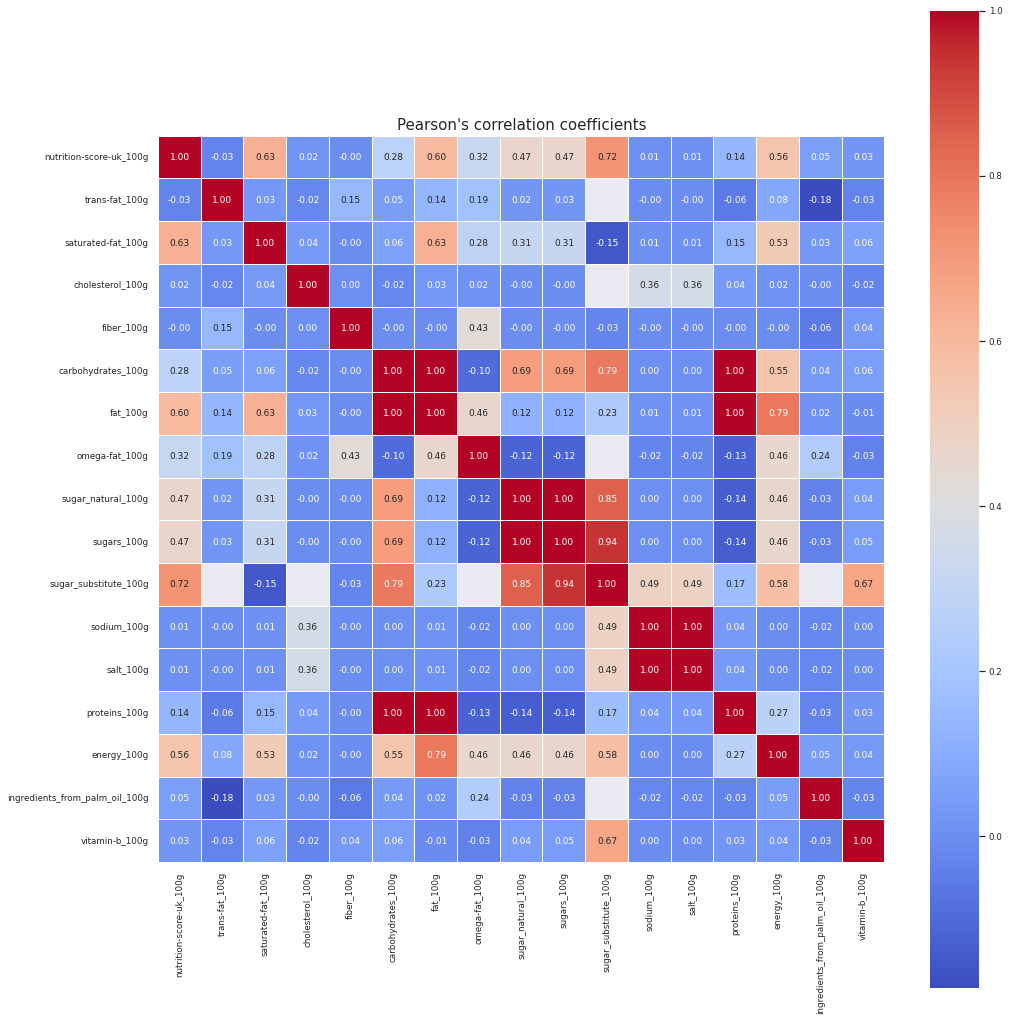

In [ ]:
corrmat = nutrition.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, linewidths=0.01, cmap="coolwarm")
plt.title("Pearson's correlation coefficients", fontsize = 15)
plt.tight_layout()

##Between food nutriments and nutrition scores
If we look at the first column of the heatmap below, we will see the correlation with nutrition scores in the descending order. Positive correlation features are sugar_substitute, saturated fat, fat, energy, sugars, sugar from natural origins, omega type fat, carbohydrates, protein in a descending order. 
Interestingly, salt and sodium level are not negatively affected the correlation with nutrition score. 

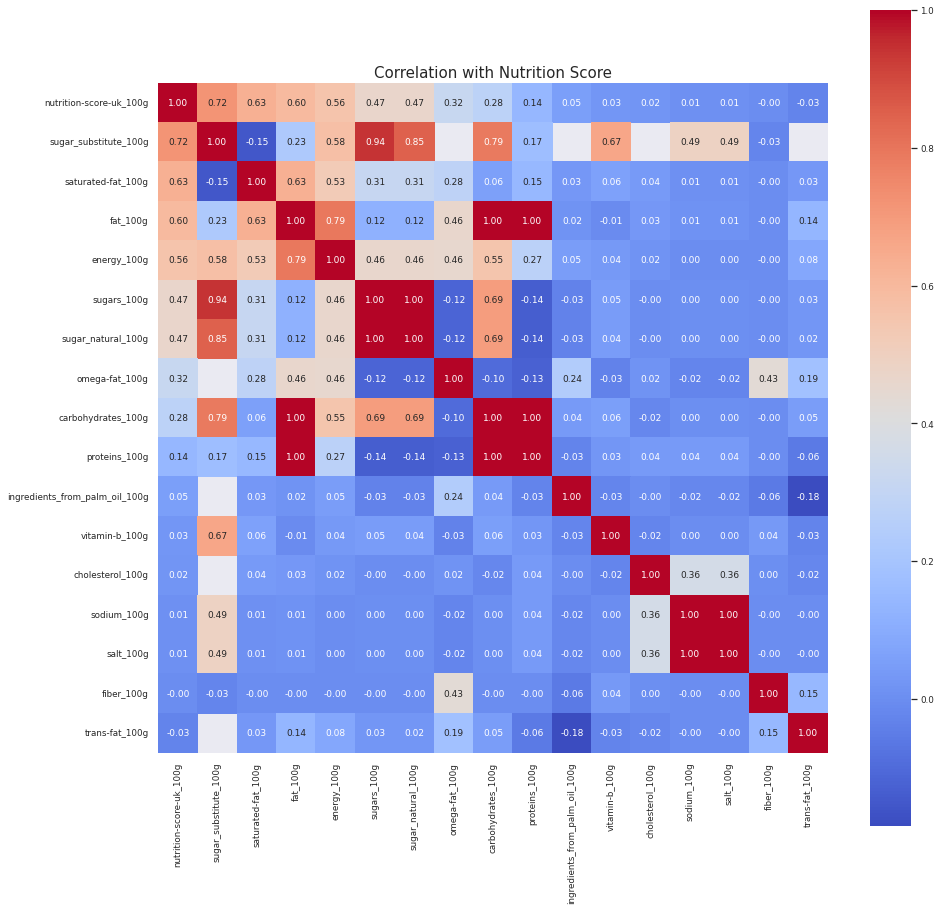

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
corrmat = nutrition.corr()

cols = corrmat.nlargest(25, 'nutrition-score-uk_100g')['nutrition-score-uk_100g'].index
cm = corrmat.loc[cols, cols] 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f', annot_kws={'size': 9},cmap = 'coolwarm',
                 yticklabels=cols.values, xticklabels=cols.values)
plt.title("Correlation with Nutrition Score", fontsize = 15)
plt.show()

##Between food nutriments and carbohydrates
If we focus on the first column below, we will see the correlation with carbohydrates of all the different food nutriments in the descending order. Carbohydrates, as a energy factory, are [positively correlated with other nutriments providing energy, such as protein, fat, sugars, energy. 
Interestingly, carbyhydrates is correlated with sugar substitute at 0.79, even higher than its correlation with sugar. Therefore, consuming products with sugar substitute isn't a healthy option once and for all, carbohydrates should also be taken into consideration as calculating nutrition intake. 

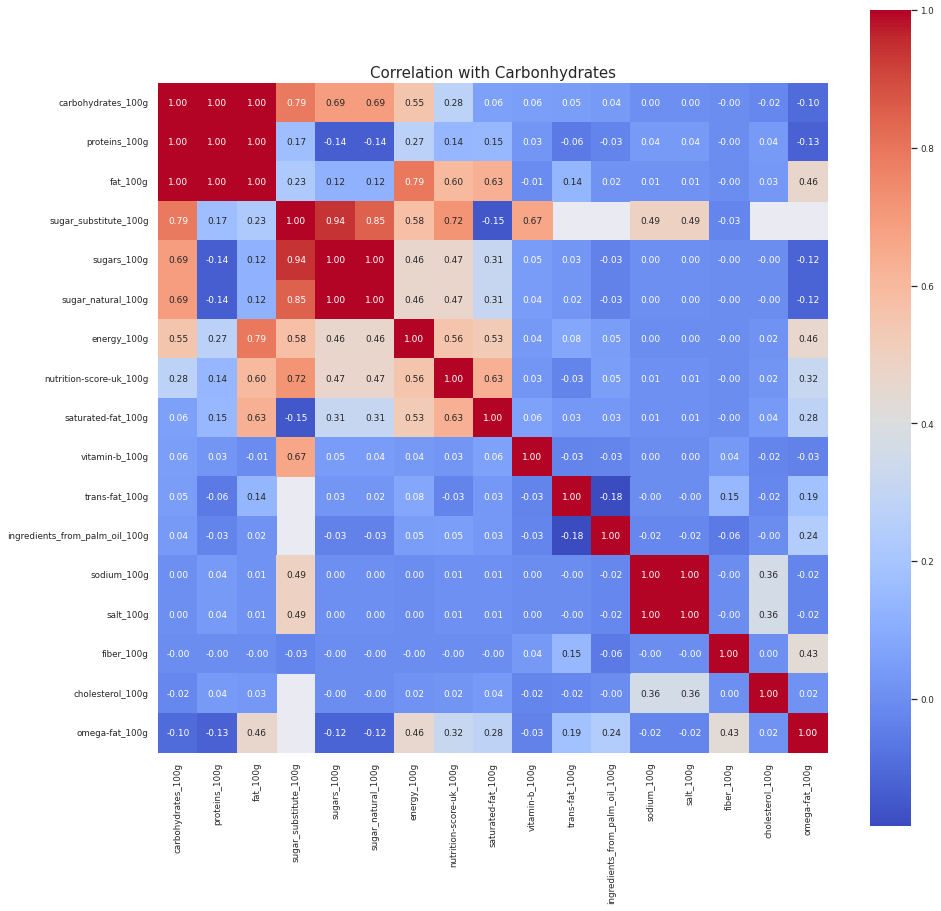

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
corrmat = nutrition.corr()
cols = corrmat.nlargest(25, 'carbohydrates_100g')['carbohydrates_100g'].index
cm = corrmat.loc[cols, cols] 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f', annot_kws={'size': 9},cmap = 'coolwarm',
                 yticklabels=cols.values, xticklabels=cols.values)
plt.title("Correlation with Carbohydrates", fontsize = 15)
plt.show()

## Attributes VS Nutrition Grade Barplot 
Following the nutrition score correlation analysis, we want to further analysize the attributes contributing to the nutrition_grade, and select features for machine learning purpose. We choose energy, sugar, fat, saturated fat, carbohydrates, fiber, salt and protein as our potential feature because they show high correlation with nutrition score.

In [ ]:
def boxplot_multiv (feature,plotColor="#CC9900"):

    plt.figure(figsize=(15, 4)) 
    
    sns.boxplot(data=food_fact_df.sort_values(by = ['nutrition_grade_fr']), x="nutrition_grade_fr",y=feature, color=plotColor)

(0.0, 20.0)

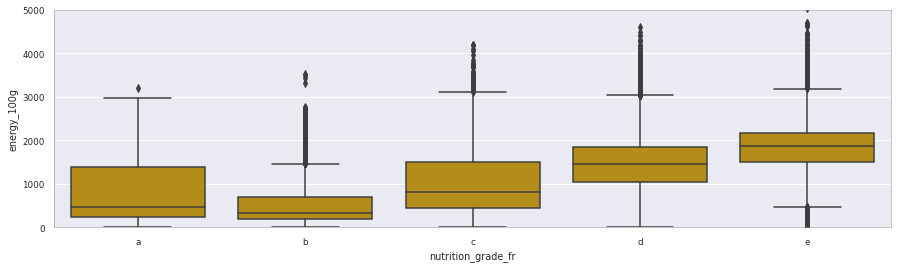

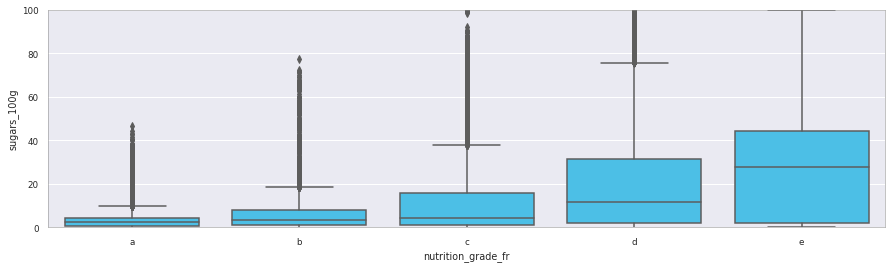

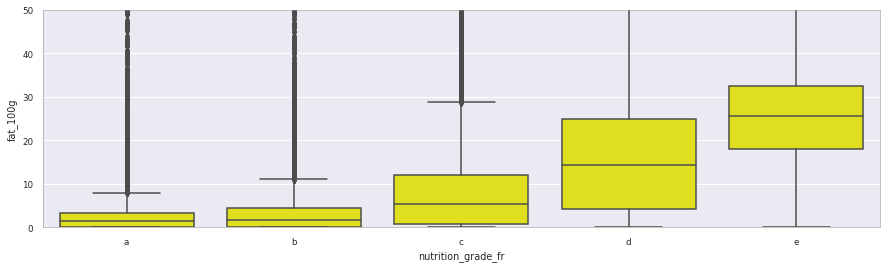

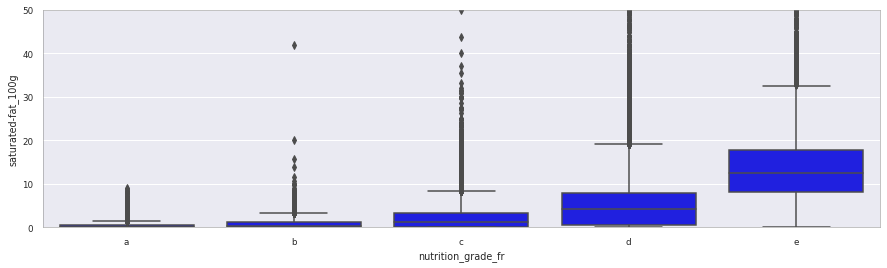

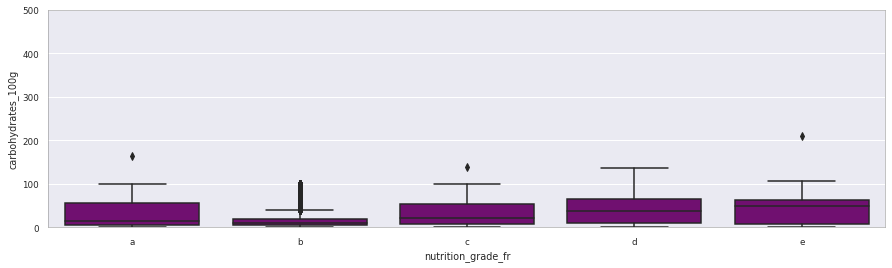

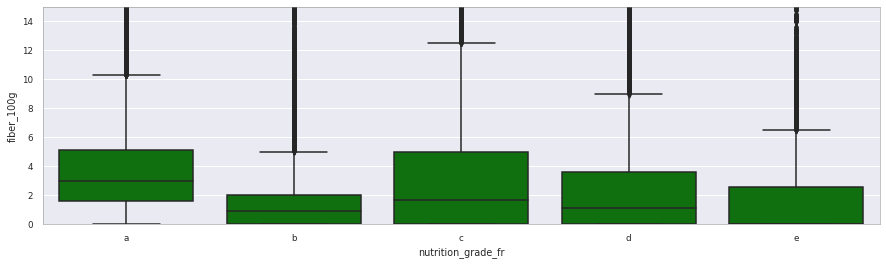

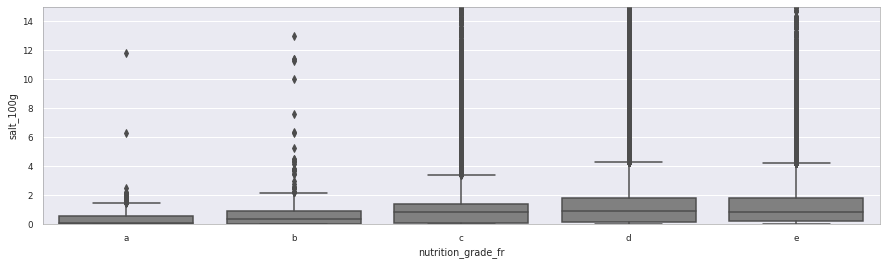

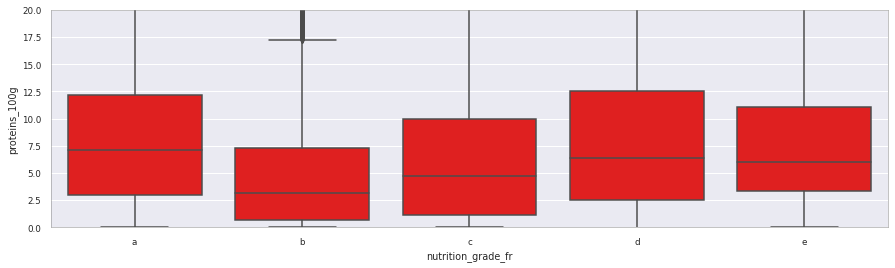

In [ ]:
boxplot_multiv("energy_100g")
plt.ylim (0,5000)
boxplot_multiv("sugars_100g","#33CCFF")
plt.ylim (0,100)
boxplot_multiv("fat_100g","yellow")
plt.ylim (0,50)
boxplot_multiv("saturated-fat_100g","blue")
plt.ylim (0,50)
boxplot_multiv("carbohydrates_100g","purple")
plt.ylim (0,500)
boxplot_multiv("fiber_100g","green")
plt.ylim (0,15)
boxplot_multiv("salt_100g","grey")
plt.ylim (0,15)
boxplot_multiv("proteins_100g","red")
plt.ylim (0,20)

## summary
* sugar, fat, saturated fat, and salt are inversely related to the nutrition grade. 
* Fiber amount is high in grade A products, strangly drop in grade B, then drop in from grade C to grade E products. 
* Energy is high in grade A products, drop in grade B, then gradually increase from Grade C to Grade E products. The high energy grade A products could foods designed for fitness use, which provides energy efficiently but does overloaded with unhealthy nutrients such as salt, fat, and sugar.
* Carbohydrates and proteins don't discriminate among the nutrition grade. It's not odd cause body consume most carbohydrates and protein from meal rather than shelved products. 

We have looked at other attributes listed in the nutrition score plot, but their correlation with grade is not as numerically as the correlation provided by the nutrition score VS attributes. The final attributes we choose are "energy_100g", "sugars_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "fiber_100g", "salt_100g". 

# Modeling
Based on our previous analysis and boxplot, we decided to use the features which is generated by our boxplot and correlation matrix analysis. After the feature seleciton, we decided to use PCA to reduce the dimensions of our data. Finally we use MXNet to construct the our final model, which is the neural network.

## Feature Selection
Based on our previous analysis, we choose several features which are related to nutrition grades, which are ["energy_100g", "sugars_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "fiber_100g", "salt_100g"], also, we add some other numeric features into our final features which can add more information into our datasets.

In [ ]:
all_quant_filtered = filtered_selection
filtered_selection_boxplot = ["energy_100g", "sugars_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "fiber_100g", "salt_100g"]
print(all_quant_filtered)

new_selection = []
for i in filtered_selection_boxplot:
  new_selection.append(i)
for i in all_quant_filtered:
  if i not in filtered_selection_boxplot:
    new_selection.append(i)

new_selection

['nutrition-score-uk_100g', 'product_name', 'trans-fat_100g', 'saturated-fat_100g', 'cholesterol_100g', 'fiber_100g', 'carbohydrates_100g', 'fat_100g', 'omega-fat_100g', 'sugar_natural_100g', 'sugars_100g', 'sugar_substitute_100g', 'sodium_100g', 'salt_100g', 'proteins_100g', 'energy_100g', 'ingredients_from_palm_oil_100g', 'vitamin-b_100g']


['energy_100g',
 'sugars_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'fiber_100g',
 'salt_100g',
 'nutrition-score-uk_100g',
 'product_name',
 'trans-fat_100g',
 'cholesterol_100g',
 'omega-fat_100g',
 'sugar_natural_100g',
 'sugar_substitute_100g',
 'sodium_100g',
 'proteins_100g',
 'ingredients_from_palm_oil_100g',
 'vitamin-b_100g']

In [ ]:
try:
  new_selection.remove('product_name')
except:
  pass
filtered_selection = new_selection
cleaned_food_fact_df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_en', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'vitamin-b_100g',
       'ingredients_from_palm_oil_100g', 'sugar_substitute_100g',
       'omega-fat_100g', 'sugar_natural_100g', 'carbonhydtates_over_fat_100g',
       'carbonhydtates_multiply_sugar_100g'],
      dtype='object')

In [ ]:
cleaned_food_fact_df['nutrition_grade_fr']

0         NaN
1           d
2           b
3           d
4         NaN
         ... 
356022      b
356023    NaN
356024    NaN
356025    NaN
356026    NaN
Name: nutrition_grade_fr, Length: 356027, dtype: object

In [ ]:
filtered_selections_name = filtered_selection
filtered_quant_attrs = filtered_selections_name
attributes_pd = cleaned_food_fact_df[filtered_quant_attrs]

## Fill NAN data and filter out the labels whcih are NAN

In [ ]:
# refer to https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/
# data = data.drop(data.index[[1, 9, 29]])
# refer to https://www.adamsmith.haus/python/answers/how-to-find-the-indices-of-rows-in-a-pandas-dataframe-containing-nan-values-in-python#:~:text=Use%20pandas.,for%20index%2C%20row%20in%20pandas.
fillna_attributes_pd = attributes_pd.fillna(0)
y_labels = cleaned_food_fact_df[['nutrition_grade_fr']]
grade_nan_index = [index for index, row in y_labels.iterrows() if row.isnull().any()]
X = fillna_attributes_pd.drop(fillna_attributes_pd.index[grade_nan_index])
Y = y_labels.drop(y_labels.index[grade_nan_index])

## Split the data into training dataset and test dataset.

In [ ]:
# split data
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

## Use PCA to reduce the dimensions of the training and test data

In [ ]:
# Do the PCA
# refer to homework 4
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_x_train = scaler.transform(X_train)
pca = PCA()
pca.fit_transform(scaled_x_train)
print(pca.explained_variance_ratio_)


[2.03413434e-01 1.28861519e-01 1.17646843e-01 6.11055801e-02
 5.92314539e-02 5.88567595e-02 5.88235150e-02 5.88110103e-02
 5.85699409e-02 5.80771432e-02 5.06783965e-02 3.56173084e-02
 2.33615346e-02 1.76060089e-02 9.31520489e-03 2.43470090e-05
 7.89419232e-13]


In [ ]:
# Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_
# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = explained_variance_ratios.cumsum()
cum_evr

array([0.20341343, 0.33227495, 0.4499218 , 0.51102738, 0.57025883,
       0.62911559, 0.68793911, 0.74675012, 0.80532006, 0.8633972 ,
       0.9140756 , 0.9496929 , 0.97305444, 0.99066045, 0.99997565,
       1.        , 1.        ])

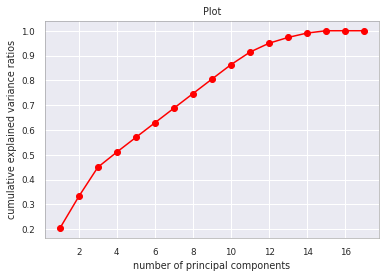

In [ ]:
# refer to https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis/blob/master/functions.py
def display(pca):
    plt.plot(np.arange(len(pca.explained_variance_ratio_))+1, pca.explained_variance_ratio_.cumsum(),c="red",marker='o')
    plt.xlabel("number of principal components")
    plt.ylabel("cumulative explained variance ratios")
    plt.title("Plot")
    plt.show(block=False)

display(pca) 

## N seleciton and label transform
Since the ratios are beyond 0.8 when n = 10, so we choose n = 10.
Also we change the nutrition grade from 'a', 'b', 'c', 'd' and 'e' to 0, 1, 2, 3, 4, which can be used to put into the model.

In [ ]:
# so here we can choose n = 10
# Since the ratios are beyond 0.8 when n = 10, so we choose n = 10
n = 10
t = PCA(n_components = n)
t.fit_transform(scaled_x_train)


scaler.fit(X_test)
scaled_x_test = scaler.transform(X_test)
x_test_pca = t.fit_transform(scaled_x_test)

scaler.fit(X_train)
scaled_x_train = scaler.transform(X_train)
x_train_pca = t.fit_transform(scaled_x_train)

x_train_pca.shape[1]

10

In [ ]:
all_grades = set([i[0] for i in (Y_train.values.tolist() + Y_test.values.tolist())])
all_grades
grades_dict = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4}

## Use MXNet to construct dataset and data loader

In [ ]:
Y_train_num = Y_train['nutrition_grade_fr'].apply(lambda row : grades_dict[row])
Y_test_num = Y_test['nutrition_grade_fr'].apply(lambda row : grades_dict[row])
Y_train_num = Y_train_num.values
Y_test_num = Y_test_num.values
import mxnet as mx
import numpy as np
Y_train_num = np.reshape(Y_train_num, (-1, 1))
print(Y_train_num.shape)
Y_test_num = np.reshape(Y_test_num, (-1, 1))

x_train_pca_reshape = np.reshape(x_train_pca, (-1, n))
x_test_pca_reshape = np.reshape(x_test_pca, (-1, n))

train_dataset = mx.gluon.data.dataset.ArrayDataset(x_train_pca_reshape.astype(np.float64), Y_train_num.astype(np.float32))
test_dataset = mx.gluon.data.dataset.ArrayDataset(x_test_pca_reshape.astype(np.float64), Y_test_num.astype(np.float32))
train_loader = mx.gluon.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = mx.gluon.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

(203884, 1)


## Construct Neural Network. Here we choose a very straightforward neural network, consisting of 2 layers with 16 and 8 units and activation layer tanh.

In [ ]:
from mxnet import gluon, autograd, ndarray
import mxnet as mx
from mxnet import np, npx
from mxnet.gluon import nn
npx.set_np()
npx.num_gpus()

shape_of_train_loader = None
for data, label in train_loader:
    answer1 = data.asnumpy().shape, label.asnumpy().shape
    shape_of_train_loader = data.asnumpy().shape
    break

def construct_neural_network():
    ff_net = nn.Sequential()
    with ff_net.name_scope():
      ff_net.add(nn.Dense(units=16, activation='tanh'))
      ff_net.add(nn.Dropout(0.2))
      ff_net.add(nn.Dense(units=8, activation='tanh'))
      ff_net.add(nn.Dropout(0.2))
      ff_net.add(nn.Dense(units=len(all_grades))) 
    return ff_net

net = construct_neural_network()

# Set the context to use the available GPUs, otherwise just use a CPU
ctx =  mx.gpu() if mx.context.num_gpus() else mx.cpu()
net.initialize(mx.init.Xavier(), ctx=ctx)
x = mx.sym.var('data').as_np_ndarray()
sym = net(x)
mx.viz.print_summary(sym)
x = net(mx.nd.random.uniform(shape=shape_of_train_loader, ctx=ctx).as_np_ndarray())
trainer = gluon.Trainer(net.collect_params(), "adam", {'learning_rate': 0.001})
criterion = gluon.loss.SoftmaxCrossEntropyLoss()

________________________________________________________________________________________________________________________
Layer (type)                                        Output Shape            Param #     Previous Layer                  
data(null)                                                                  0                                           
________________________________________________________________________________________________________________________
sequential2_dense0_fwd(FullyConnected)                                      16          data                            
________________________________________________________________________________________________________________________
sequential2_dense0_tanh_fwd(Activation)                                     0           sequential2_dense0_fwd          
________________________________________________________________________________________________________________________
sequential2_dropout0_fwd(Dropout

training_accuracy
0.6216721272880658
training_accuracy
0.68484530419258
training_accuracy
0.7137097565282219
training_accuracy
0.7253732514567107
training_accuracy
0.7298365737380079
training_accuracy
0.735982225186871
training_accuracy
0.7396509780071021
training_accuracy
0.7420444958898197
training_accuracy
0.74439877577446


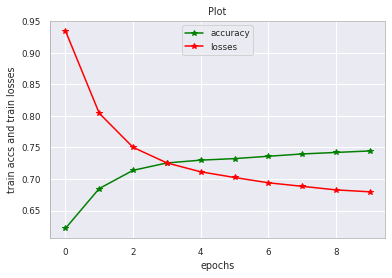

In [ ]:
from mxnet import gluon, autograd, ndarray
from mxnet import nd, autograd, gluon

#TODO: Define a training function which trains the passed network for the given number of epochs using the provided optimizer and criterion
# The function should return the final training loss and the final training accuracy
# refer to https://stackoverflow.com/questions/49226287/mxnet-metrics-api-to-compute-accuracy-for-multiclass-logistic-regression-with-ve
# refer to https://mxnet.apache.org/versions/1.6/api/python/docs/tutorials/getting-started/logistic_regression_explained.html
def train_network(net, train_loader, criterion, trainer, metric, epochs = 5):
  train_accs = []
  train_losses = []
  for epoch in range(epochs):
    cumulative_train_loss = 0
    cumulative_train_scale = 0
    metric.reset()
    for X, y in train_loader:
      data = (X.reshape((X.shape[0], -1))).as_in_context(ctx)
      label = y.as_in_context(ctx)
      with autograd.record():
        data = np.array(data, dtype=np.float32)
        label = np.array(label, dtype=np.float32)
        l = criterion(net(data), label)
        metric.update(preds=net(data).as_nd_ndarray(), labels=label.as_nd_ndarray())
        acc = metric.get()[1]
        cumulative_train_loss += nd.sum(l.as_nd_ndarray()).asscalar()
        cumulative_train_scale += data.shape[0]
      l.backward()
      current_batch_size = data.shape[0]
      trainer.step(current_batch_size)
    cumulative_train_loss /=  cumulative_train_scale
    train_losses.append(cumulative_train_loss)
    training_loss = cumulative_train_loss
    training_accuracy = metric.get()[1]
    train_accs.append(training_accuracy)
    print("training_accuracy")
    print(training_accuracy)
  
  plt.plot(np.arange(epochs), train_accs,c="green",marker='*', label="accuracy")
  plt.plot(np.arange(epochs), train_losses,c="red",marker='*', label="losses")
  plt.xlabel("epochs")
  plt.ylabel("train accs and train losses")
  plt.title("Plot")
  leg = plt.legend(loc='upper center')
  plt.show(block=False)
  return training_loss, training_accuracy


epochs = 10
metric = mx.metric.Accuracy()
lr_training_accuracy, lr_training_loss = train_network(net, train_loader, criterion, trainer, metric, epochs)

## Summary
 The final attributes we choose are "energy_100g", "sugars_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "fiber_100g", "salt_100g". Also we add some numeric features into our original chosen features. After we complete the feature selecitons, we use PCA to reduce the dimensions of the data in the same time extract the most useful information from our features. 

The model we choose is 2-layer neural network, with dropout and tanh activation layer.

The final training accuracy is about 0.74.

# Summary and looking forward
In this project, we use the open food dataset to study the nutriment of different types of food and build our recommendation to people with different nutriment needs. One of the most challenging part of the project is data cleaning as this dataset contains a great amount of NaN. How to best use existing data while minimizing the impact of the NaN values is one of the most important decisions we have to make for the project.

Looking forward, we understand that our project can serve as the starting point of more meaningful research that can further benefit different groups of people. We only touch upon a few general groups of population, so more detailed analysys can be done if we study the dataset further. Also, we consider the analysis can be the building block of food innovation. With specific nutriment target, our project can help develop new food products with specific nutriment needs. We believe this will be an area that has great growth potential in the coming years!

Last but not least, thank you for reading through our project! We hope you enjoy what we share with you in this food journey, and please let us know if you have any comments! Thank you!